Programming Assignment– 3 : Classification and Feature Engineering<br>
 **Name: HARDIK KHAIWAL<br>**
 **Roll no:22B3954**

 Video Link:   https://drive.google.com/drive/folders/1j6fasP_PQ3iVicgE4DmE-Ep3uS7BJ_p1?usp=sharing

In [ ]:
#importing required libraries
import numpy as np
import pandas as pd
from sklearn import *


In [ ]:
# Load the dataset from 'bank.csv' with comma as the separator
data = pd.read_csv('bank.csv', sep=',')

In [5]:
data.head(5000)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,37,housemaid,single,secondary,no,465,yes,no,cellular,18,may,899,3,-1,0,unknown,yes
4996,44,unemployed,divorced,tertiary,no,0,no,no,cellular,5,feb,1960,3,-1,0,unknown,yes
4997,32,technician,single,tertiary,no,654,yes,no,cellular,25,may,615,4,-1,0,unknown,yes
4998,34,admin.,married,tertiary,no,79,yes,no,cellular,5,aug,203,1,92,5,success,yes


C:\Users\HP5CD\AppData\Local\Temp\ipykernel_13504\2519470671.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data, x='age', y='marital', inner='box', palette='Dark2')


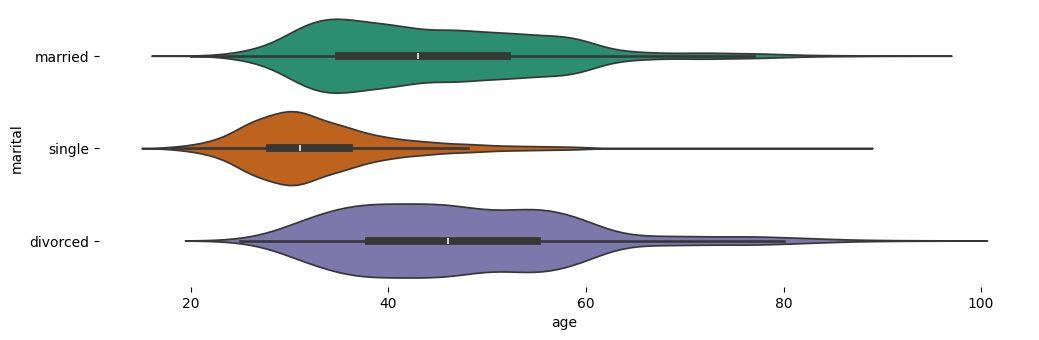

In [ ]:
# Plot age distribution across different marital statuses
from matplotlib import pyplot as plt
import seaborn as sns

# Set figure size based on number of unique marital statuses
figsize = (12, 1.2 * len(data['marital'].unique()))
plt.figure(figsize=figsize)

# Create a violin plot for age vs. marital status
sns.violinplot(data=data, x='age', y='marital', inner='box', palette='Dark2')

# Remove top, right, bottom, and left spines for a cleaner look
sns.despine(top=True, right=True, bottom=True, left=True)


In [ ]:
# Convert 'deposit' column from 'yes'/'no' to binary 1/0
data['deposit'] = data['deposit'].map({'yes': 1, 'no': 0})


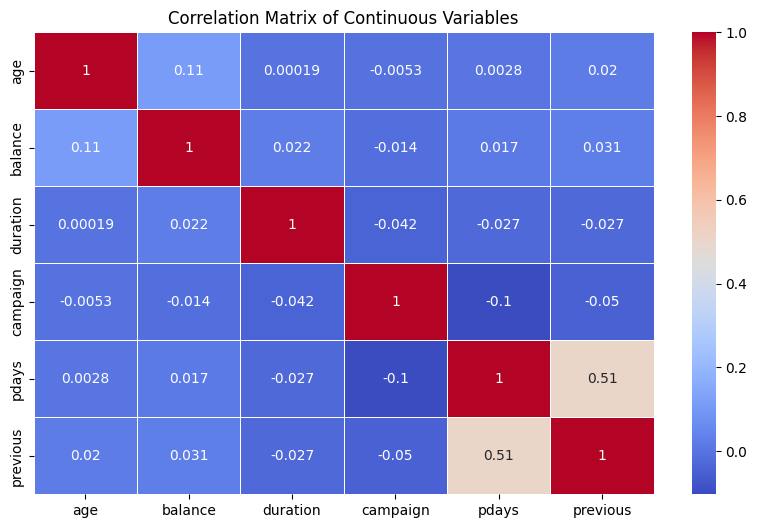

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation matrix for selected continuous variables
correlation_matrix = data[['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']].corr()

# Plot heatmap of the correlation matrix
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Continuous Variables")
plt.show()


First few rows of the dataset:
   age         job  marital  education default  balance housing loan  contact  \
0   59      admin.  married  secondary      no     2343     yes   no  unknown   
1   56      admin.  married  secondary      no       45      no   no  unknown   
2   41  technician  married  secondary      no     1270     yes   no  unknown   
3   55    services  married  secondary      no     2476     yes   no  unknown   
4   54      admin.  married   tertiary      no      184      no   no  unknown   

   day month  duration  campaign  pdays  previous poutcome deposit  
0    5   may      1042         1     -1         0  unknown     yes  
1    5   may      1467         1     -1         0  unknown     yes  
2    5   may      1389         1     -1         0  unknown     yes  
3    5   may       579         1     -1         0  unknown     yes  
4    5   may       673         2     -1         0  unknown     yes  

Summary of the dataset:
<class 'pandas.core.frame.DataFrame'>
Range

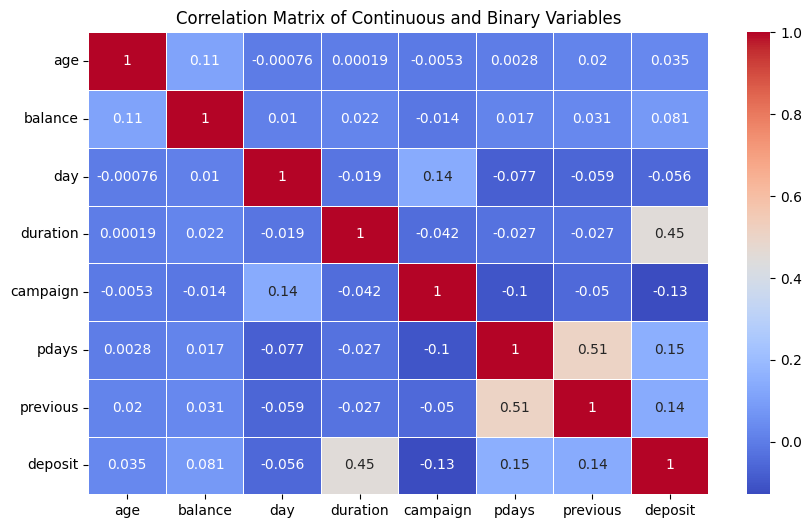


Relationship between 'poutcome' and 'job':
job       admin.  blue-collar  entrepreneur  housemaid  management  retired  \
poutcome                                                                      
failure      185          190            35         21         293       73   
other         70           91             6          9         141       36   
success      134           90            12         22         292      135   
unknown      945         1573           275        222        1840      534   

job       self-employed  services  student  technician  unemployed  unknown  
poutcome                                                                     
failure              38        99       43         208          35        8  
other                22        36       33          81          11        1  
success              38        62       67         157          52       10  
unknown             307       726      217        1377         259       51  

Relationship

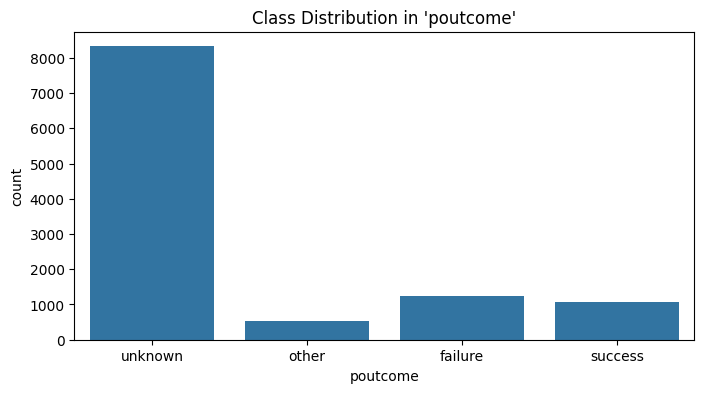


Exploratory Data Analysis - Part D
Classes in 'poutcome' will be retained as they are: 'unknown', 'failure', 'success'

Class distribution in target variable 'deposit':
deposit
no     0.52616
yes    0.47384
Name: proportion, dtype: float64


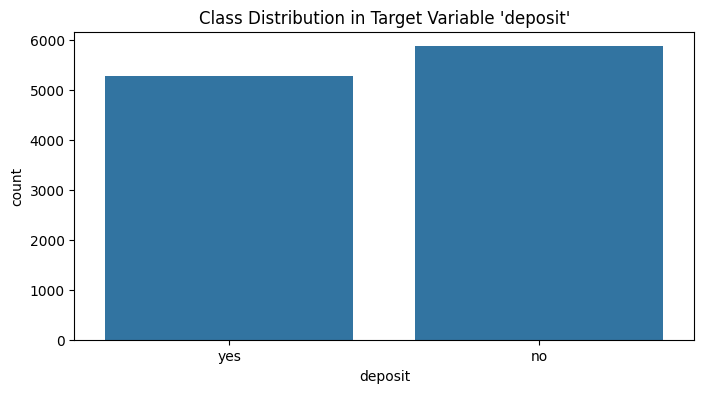

In [ ]:
# Summary of the dataset
print("\nSummary of the dataset:")
print(df.info())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Display unique values in each column to identify categorical variables
print("\nUnique values in each column:")
for column in df.columns:
    print(f"{column}: {df[column].unique()}")

# Exploratory Data Analysis - Part A
print("\nExploratory Data Analysis - Part A")
usable_variables = [
    'age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
    'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays', 'previous', 'poutcome'
]
target_variable = 'deposit'

# Display variable types and basic stats
print("\nData Types:")
print(df.dtypes)

print("\nBasic statistics of continuous variables:")
print(df[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous']].describe())

# Print usable variables
print("\nUsable Variables:")
for var in usable_variables:
    print(f"{var}: Usable")

# Part B: Check correlations among variables
print("\nExploratory Data Analysis - Part B")

# Encode binary categorical variables for correlation
df_encoded = df.copy()
label_encoder = LabelEncoder()
binary_columns = ['default', 'housing', 'loan', 'deposit']
for col in binary_columns:
    df_encoded[col] = label_encoder.fit_transform(df_encoded[col])

# Display correlation matrix
correlation_matrix = df_encoded[['age', 'balance', 'day', 'duration', 'campaign', 'pdays', 'previous', 'deposit']].corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Matrix of Continuous and Binary Variables")
plt.show()

# Check relationships among categorical variables
print("\nRelationship between 'poutcome' and 'job':")
print(pd.crosstab(df['poutcome'], df['job']))

print("\nRelationship between 'poutcome' and 'marital':")
print(pd.crosstab(df['poutcome'], df['marital']))

# Part C: Check class balance in 'poutcome'
print("\nExploratory Data Analysis - Part C")

# Class distribution in 'poutcome'
print("\nClass distribution in 'poutcome':")
print(df['poutcome'].value_counts(normalize=True))

# Plot class distribution in 'poutcome'
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='poutcome')
plt.title("Class Distribution in 'poutcome'")
plt.show()

# Part D: Classes to be used in analysis
print("\nExploratory Data Analysis - Part D")

# Retain all classes in 'poutcome' for analysis
print("Classes in 'poutcome' will be retained: 'unknown', 'failure', 'success'")

# Check class distribution in target variable 'deposit'
print("\nClass distribution in target variable 'deposit':")
print(df['deposit'].value_counts(normalize=True))

# Plot class distribution in 'deposit' (target)
plt.figure(figsize=(8, 4))
sns.countplot(data=df, x='deposit')
plt.title("Class Distribution in Target Variable 'deposit'")
plt.show()


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split, RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_curve, auc, accuracy_score
import warnings
from sklearn.svm import SVC
from sklearn.tree import plot_tree

In [11]:
df = pd.read_csv('bank.csv')
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


Understanding the Dataset¶
Age:- Age of the customer

Job:- Job of the customer

Marital:- Marital status of the customer (Married or unmarried)

Education:- Education level of the customer

Default:- Has ever defaulted in credit

Balance:- Account Balance

Housing:- If the client has housing loan with the bank

Loan:- If the client has personal loan with the bank

Contact:- Mode of communication

Month:- Month when last contacted

Day:- Day when last contacted

Duration:- Duration of last contact in seconds

Campaign:- Number of times the person was contacted during the current campaign

pdays:- number of days since client was last contacted after the previous campaign

previous:- Number of times the person was contacted during the previous campaigns

poutcome:- outcome of the previous campaign

deposit:- does the client have a deposit with the bank

**EDA**

In [12]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        11162 non-null  int64 
 1   job        11162 non-null  object
 2   marital    11162 non-null  object
 3   education  11162 non-null  object
 4   default    11162 non-null  object
 5   balance    11162 non-null  int64 
 6   housing    11162 non-null  object
 7   loan       11162 non-null  object
 8   contact    11162 non-null  object
 9   day        11162 non-null  int64 
 10  month      11162 non-null  object
 11  duration   11162 non-null  int64 
 12  campaign   11162 non-null  int64 
 13  pdays      11162 non-null  int64 
 14  previous   11162 non-null  int64 
 15  poutcome   11162 non-null  object
 16  deposit    11162 non-null  object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [13]:
df.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [14]:
df.isnull().sum()

age          0
job          0
marital      0
education    0
default      0
balance      0
housing      0
loan         0
contact      0
day          0
month        0
duration     0
campaign     0
pdays        0
previous     0
poutcome     0
deposit      0
dtype: int64

There are no missing values in the data.

In [15]:
df.duplicated().sum()

0

There are is duplicate data.

Checking the values in each column

In [16]:
for column in df.columns:
    print(f"Unique values in {column}:")
    print(df[column].unique(),"\n")

Unique values in age:
[59 56 41 55 54 42 60 37 28 38 30 29 46 31 35 32 49 43 26 40 33 23 48 45
 36 52 53 39 57 51 44 24 50 27 34 47 25 58 61 68 75 22 69 66 85 72 90 67
 71 21 74 65 62 83 70 76 77 19 73 63 20 78 95 64 79 82 18 86 84 87 92 81
 80 93 88 89] 

Unique values in job:
['admin.' 'technician' 'services' 'management' 'retired' 'blue-collar'
 'unemployed' 'entrepreneur' 'housemaid' 'unknown' 'self-employed'
 'student'] 

Unique values in marital:
['married' 'single' 'divorced'] 

Unique values in education:
['secondary' 'tertiary' 'primary' 'unknown'] 

Unique values in default:
['no' 'yes'] 

Unique values in balance:
[2343   45 1270 ... 1594 2593 -134] 

Unique values in housing:
['yes' 'no'] 

Unique values in loan:
['no' 'yes'] 

Unique values in contact:
['unknown' 'cellular' 'telephone'] 

Unique values in day:
[ 5  6  7  8  9 12 13 14 15 16 19 20 21 23 26 27 28 29 30  2  3  4 11 17
 18 24  1 10 22 25 31] 

Unique values in month:
['may' 'jun' 'jul' 'aug' 'oct' 'nov' 'dec' 

In [17]:
df

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no
11160,43,technician,married,secondary,no,0,no,yes,cellular,8,may,9,2,172,5,failure,no


In [18]:
df.deposit.value_counts()

deposit
no     5873
yes    5289
Name: count, dtype: int64

The dataset is balanced

Lets check the distribution of the data

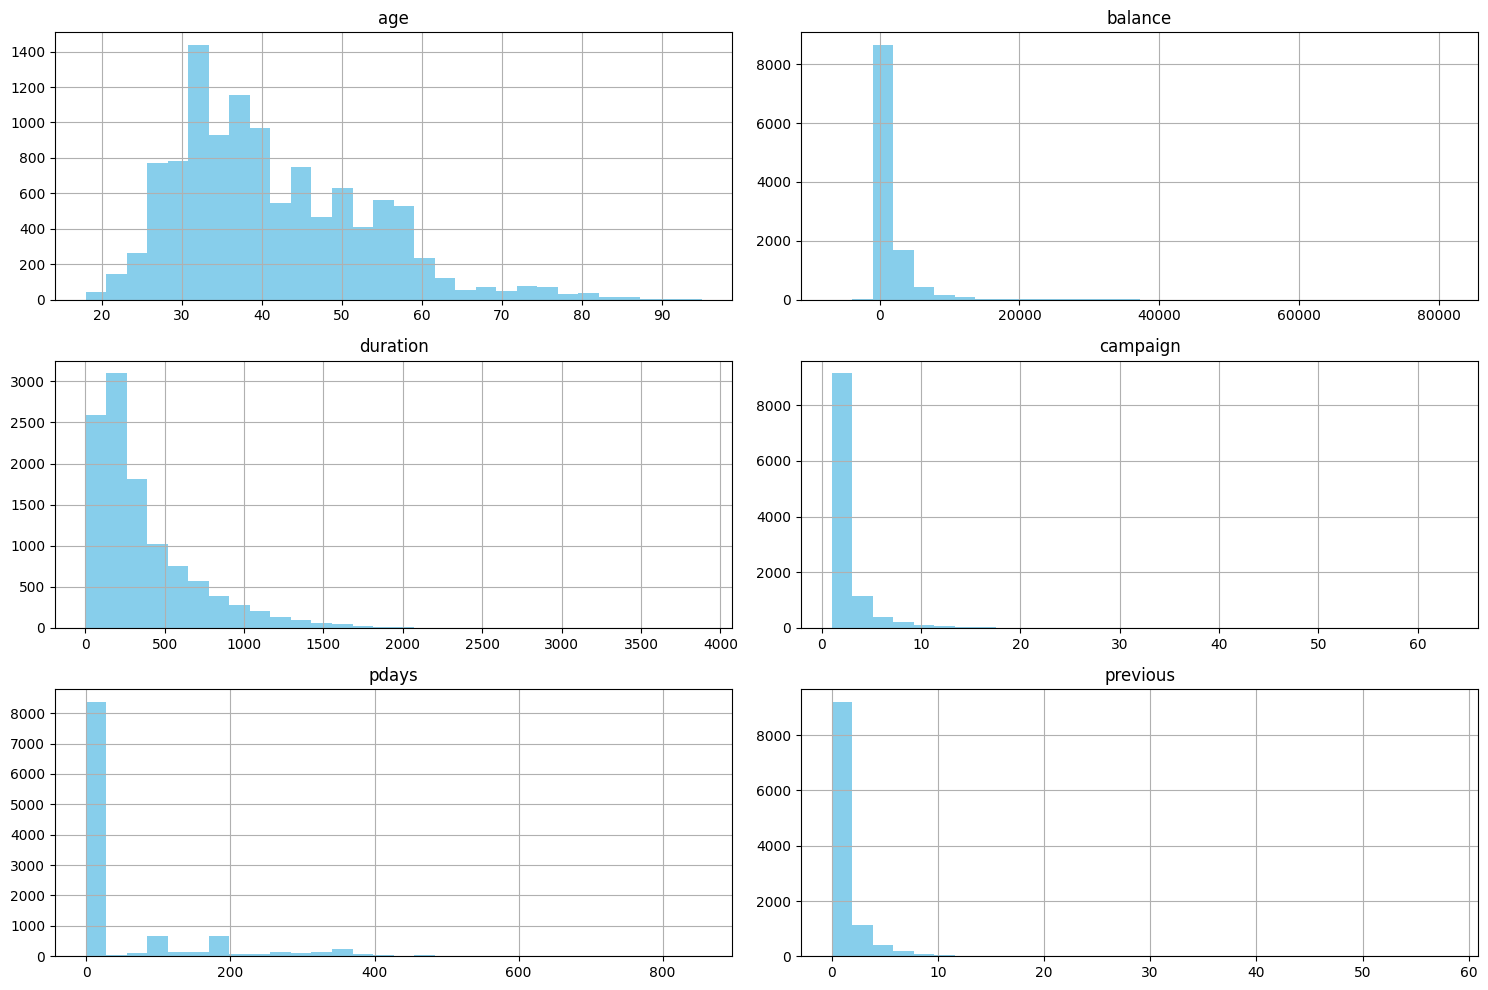

In [ ]:
# Select numerical columns, excluding 'day'
numerical_columns = df.select_dtypes(include=['int64']).columns
numerical_columns = numerical_columns.drop('day')

# Plot histograms for each numerical column
df[numerical_columns].hist(bins=30, figsize=(15, 10))
plt.tight_layout()

# Set histogram bar colors to sky blue
for ax in plt.gcf().axes:
    for patch in ax.patches:
        patch.set_facecolor('skyblue')
        
plt.show()


Insights from these plots <br>
Age: Most people are between 20 and 40 years old, with a peak around 30. The distribution skews slightly right, with a few individuals up to around 90 years.

Balance: The distribution is highly right-skewed, with most values close to zero. A few individuals have balances that reach as high as 80,000, but such high values are rare.

Duration: This feature is also right-skewed, with the majority of contact durations being under 500 seconds.

Campaign: The majority of people have been contacted only a few times (less than 5), with a steep drop-off. There are some cases where individuals were contacted up to 20 times, but these are uncommon.

Pdays: This variable, indicating the number of days since a person was last contacted in a previous campaign, shows a concentration at zero, suggesting that many individuals were either never contacted or contacted very recently. A few have values extending up to 850 days.

Previous: Most individuals were contacted fewer than 5 times in prior campaigns, with a few individuals contacted as many as 50 times, suggesting some clients have been targeted in past campaigns much more frequently than others.

Overall, these histograms suggest that many features are highly right-skewed.

**Box plots** to visualize the distribution and identify potential outliers in each of the numerical columns in the DataFrame df<br>
They are a great tool for visualizing the distribution, variability, and potential outliers in numerical data

C:\Users\HP5CD\AppData\Local\Temp\ipykernel_13504\3263702980.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=column, ax=ax, palette=[palette[i % len(palette)]])
C:\Users\HP5CD\AppData\Local\Temp\ipykernel_13504\3263702980.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=column, ax=ax, palette=[palette[i % len(palette)]])
C:\Users\HP5CD\AppData\Local\Temp\ipykernel_13504\3263702980.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, y=column, ax=ax, palette=[palette[i % len(palette)]])
C:\Users\HP5CD\AppD

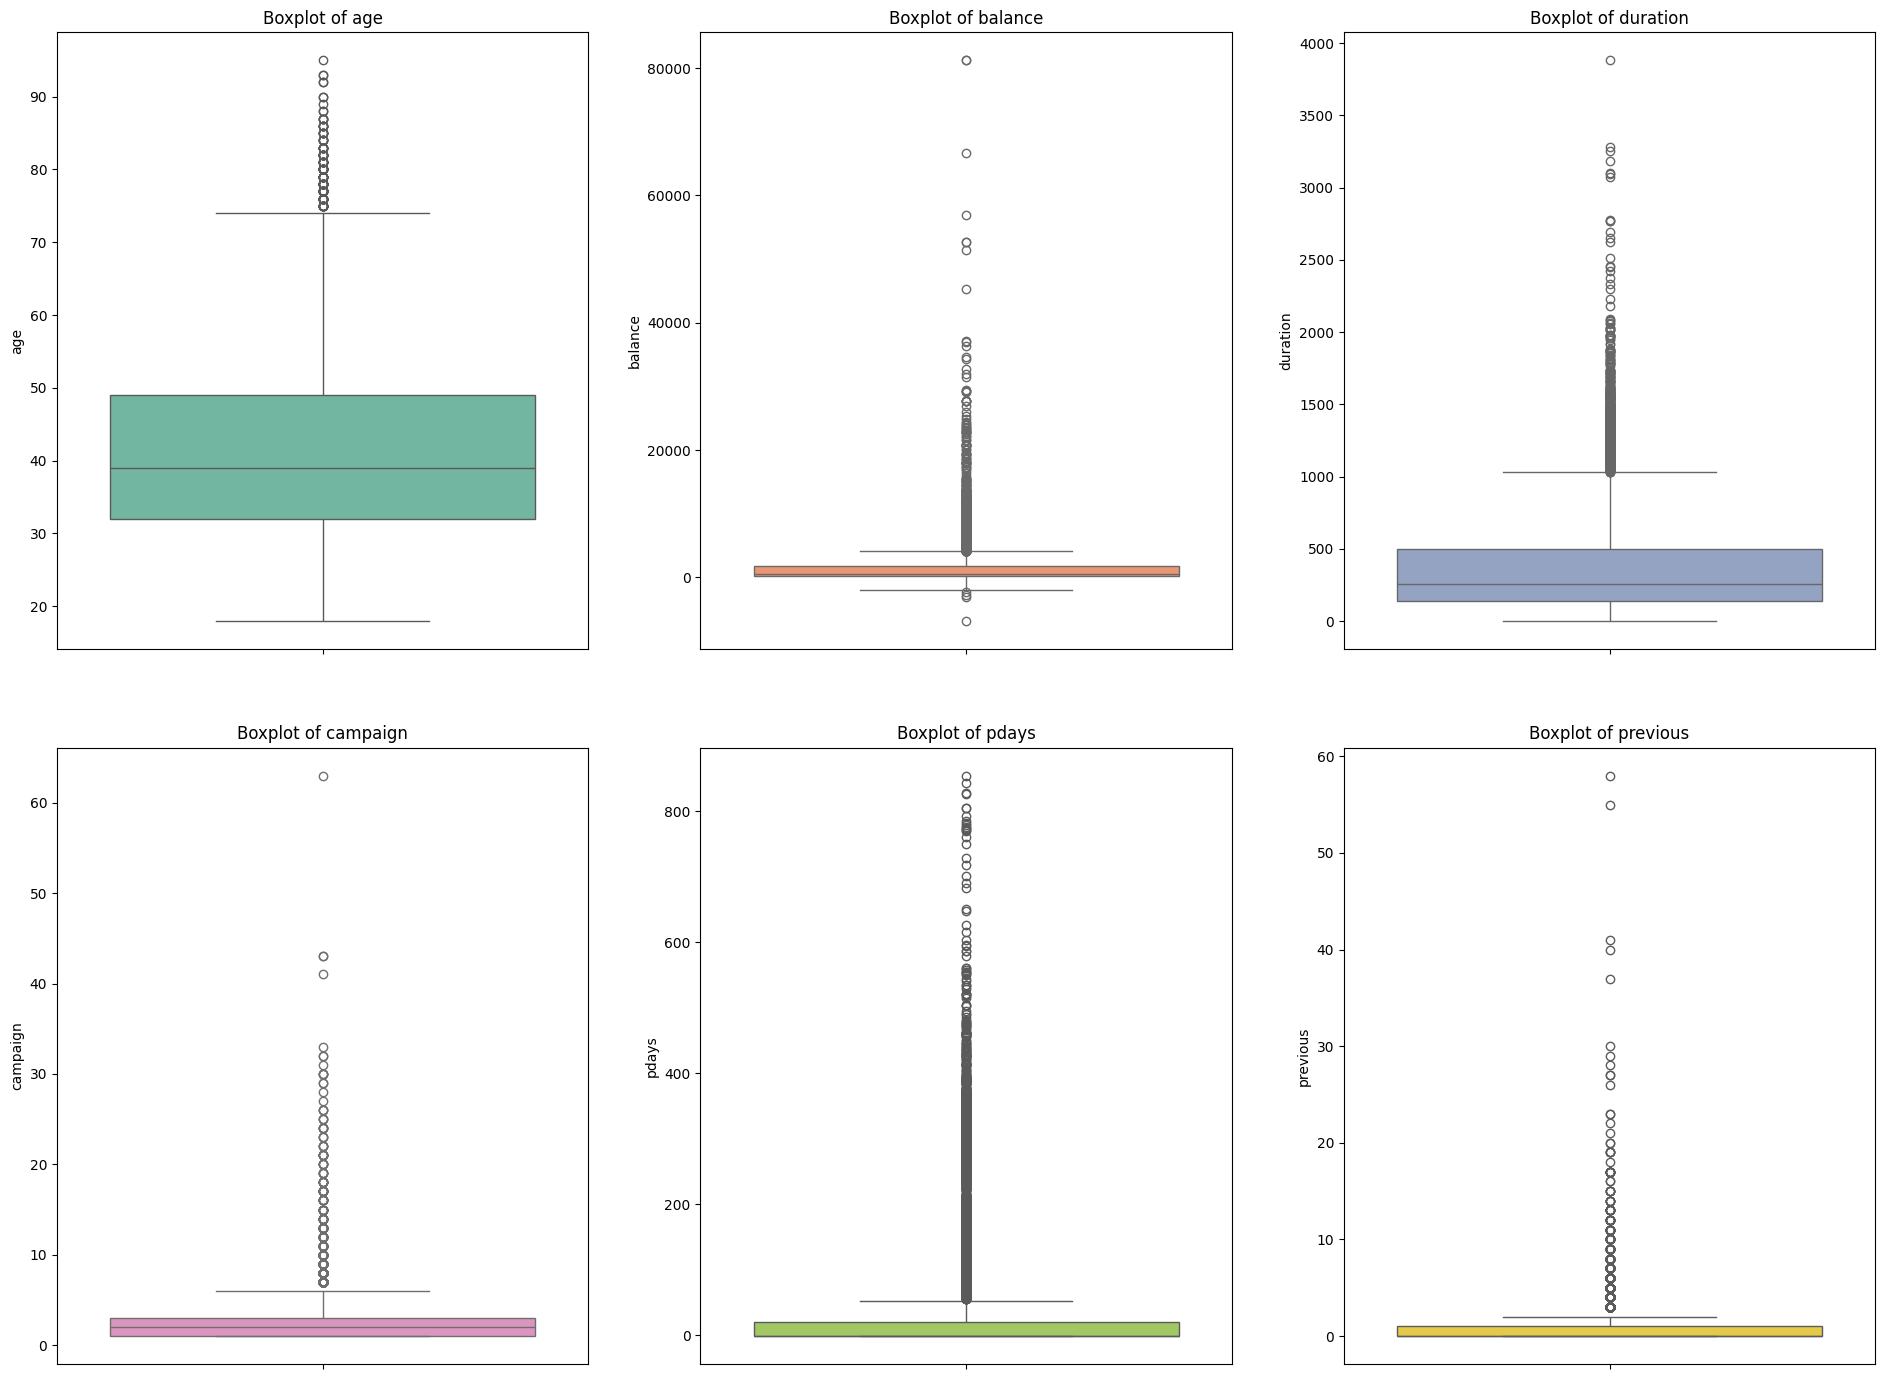

In [ ]:
# Create subplots for boxplots of numerical columns
fig, axes = plt.subplots(nrows=2, ncols=len(numerical_columns)//2 + len(numerical_columns)%2, figsize=(20, 15))
fig.tight_layout(pad=5.0)  # Adjust layout for better spacing

# Generate a color palette for the boxplots
palette = sns.color_palette("Set2", len(numerical_columns))

# Iterate through each numerical column and corresponding axis
for i, (ax, column) in enumerate(zip(axes.flatten(), numerical_columns)):
    sns.boxplot(data=df, y=column, ax=ax, palette=[palette[i % len(palette)]])  # Create a boxplot for each column
    ax.set_title(f'Boxplot of {column}')  # Set title for each subplot
    ax.set_ylabel(column)  # Label the y-axis with the column name

plt.show()  # Display the plots


Grid of **bar plots**, where each bar plot shows the relationship between the deposit variable (assumed to be the target variable) and each numerical column

C:\Users\HP5CD\AppData\Local\Temp\ipykernel_13504\3079945896.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='deposit', y=column, ax=ax, palette='Set2')
C:\Users\HP5CD\AppData\Local\Temp\ipykernel_13504\3079945896.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='deposit', y=column, ax=ax, palette='Set2')
C:\Users\HP5CD\AppData\Local\Temp\ipykernel_13504\3079945896.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=df, x='deposit', y=column, ax=ax, palette='Set2')
C:\Users\HP5CD\AppData\Local\Temp\ipykernel

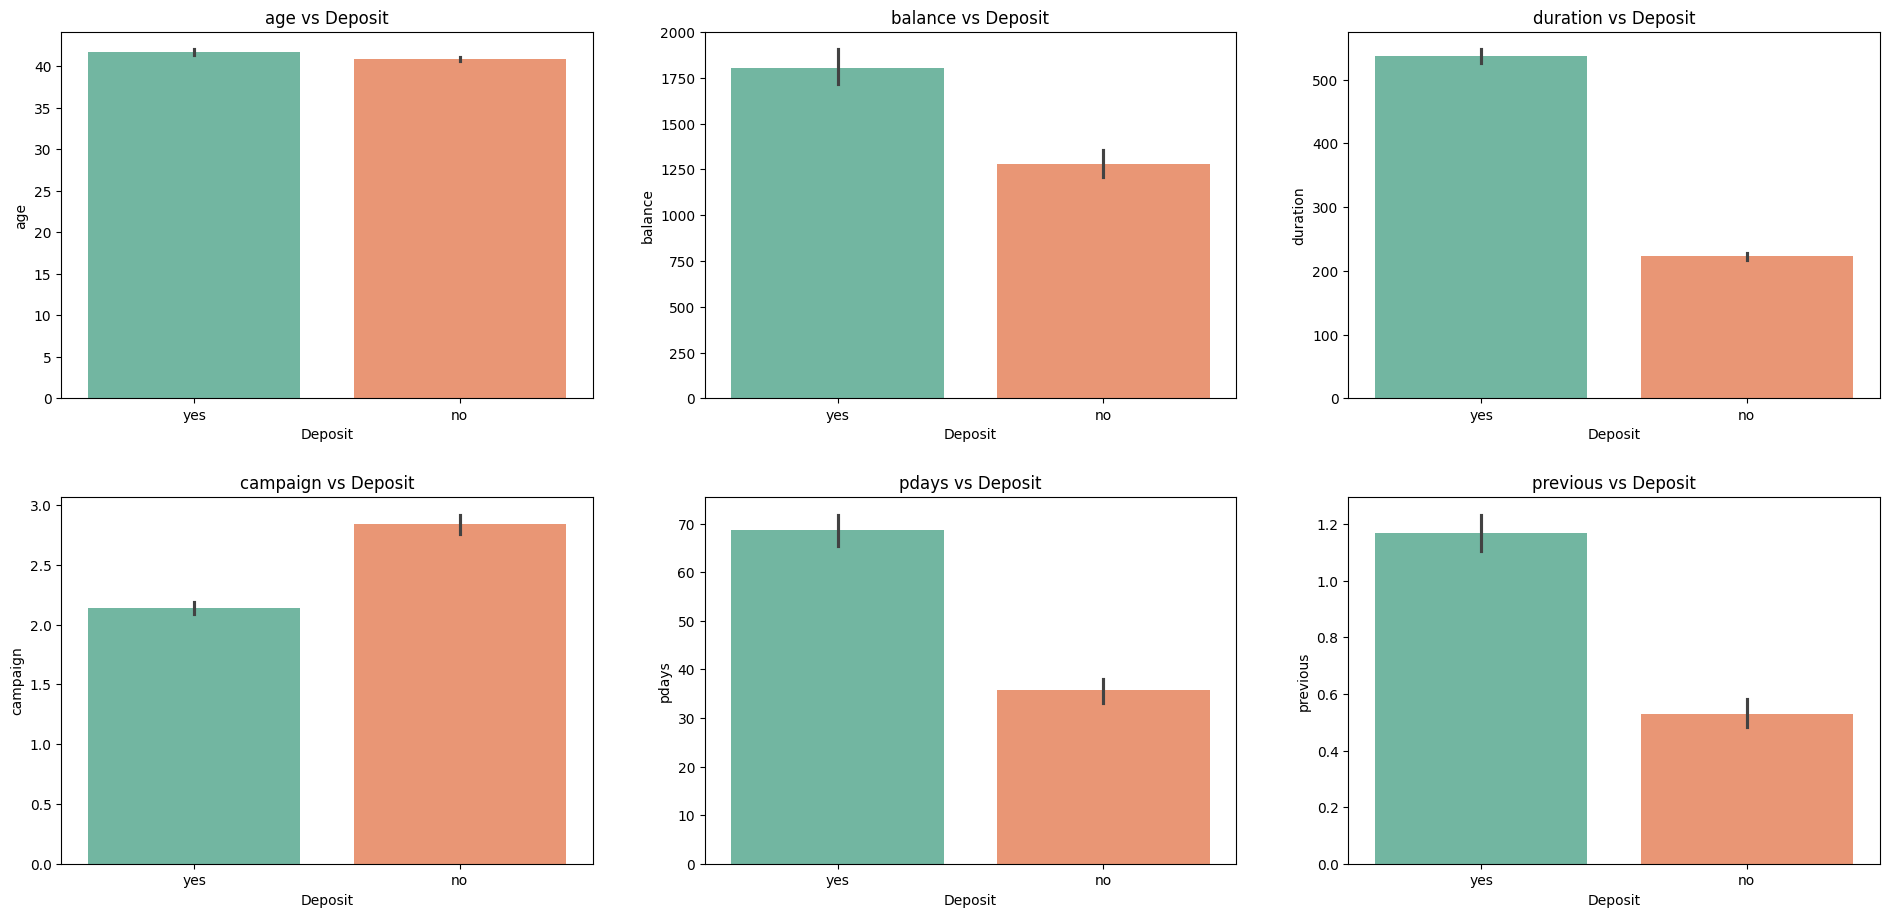

In [ ]:
# Create subplots for barplots of numerical columns against 'deposit'
fig, axes = plt.subplots(nrows=2, ncols=len(numerical_columns)//2 + len(numerical_columns)%2, figsize=(20, 10))
fig.tight_layout(pad=5.0)  # Adjust layout for better spacing between plots

# Iterate through each axis and corresponding numerical column
for ax, column in zip(axes.flatten(), numerical_columns):
    # Create a barplot showing the relationship between 'deposit' and the numerical column
    sns.barplot(data=df, x='deposit', y=column, ax=ax, palette='Set2')
    ax.set_title(f'{column} vs Deposit')  # Set the title for each subplot
    ax.set_xlabel('Deposit')  # Label the x-axis as 'Deposit'
    ax.set_ylabel(column)  # Label the y-axis with the column name

plt.show()  # Display the bar plots


**Insights:**<br> A significant difference between the bars for a given variable could suggest that the variable is relevant to predicting deposit behavior<br>
***Age vs Deposit:*** The average age is quite similar for both groups ("yes" and "no"), indicating that age might not have a strong impact on the likelihood of making a deposit.

***Balance vs Deposit:*** People who made a deposit ("yes") generally have a higher average balance than those who did not ("no"), suggesting that a higher balance might be positively associated with making a deposit.

***Duration vs Deposit:*** Duration is significantly higher for those who made a deposit. This implies that longer contact durations could be strongly associated with a successful deposit.

***Campaign vs Deposit:*** Individuals who did not make a deposit were contacted more times on average than those who did, indicating that excessive contact attempts may reduce the chance of a deposit.

***Pdays vs Deposit:*** The average "pdays" (days since the last contact in a previous campaign) is higher for those who made a deposit, suggesting that recent contacts in previous campaigns could negatively affect the likelihood of a deposit.

***Previous vs Deposit:*** Those who made a deposit had slightly more prior contacts on average than those who didn’t, implying a mild association between prior engagement and successful deposits.

Overall, **balance, duration, and previous appear to have positive associations **with making a **deposit, while campaign and pdays may have negative associations**

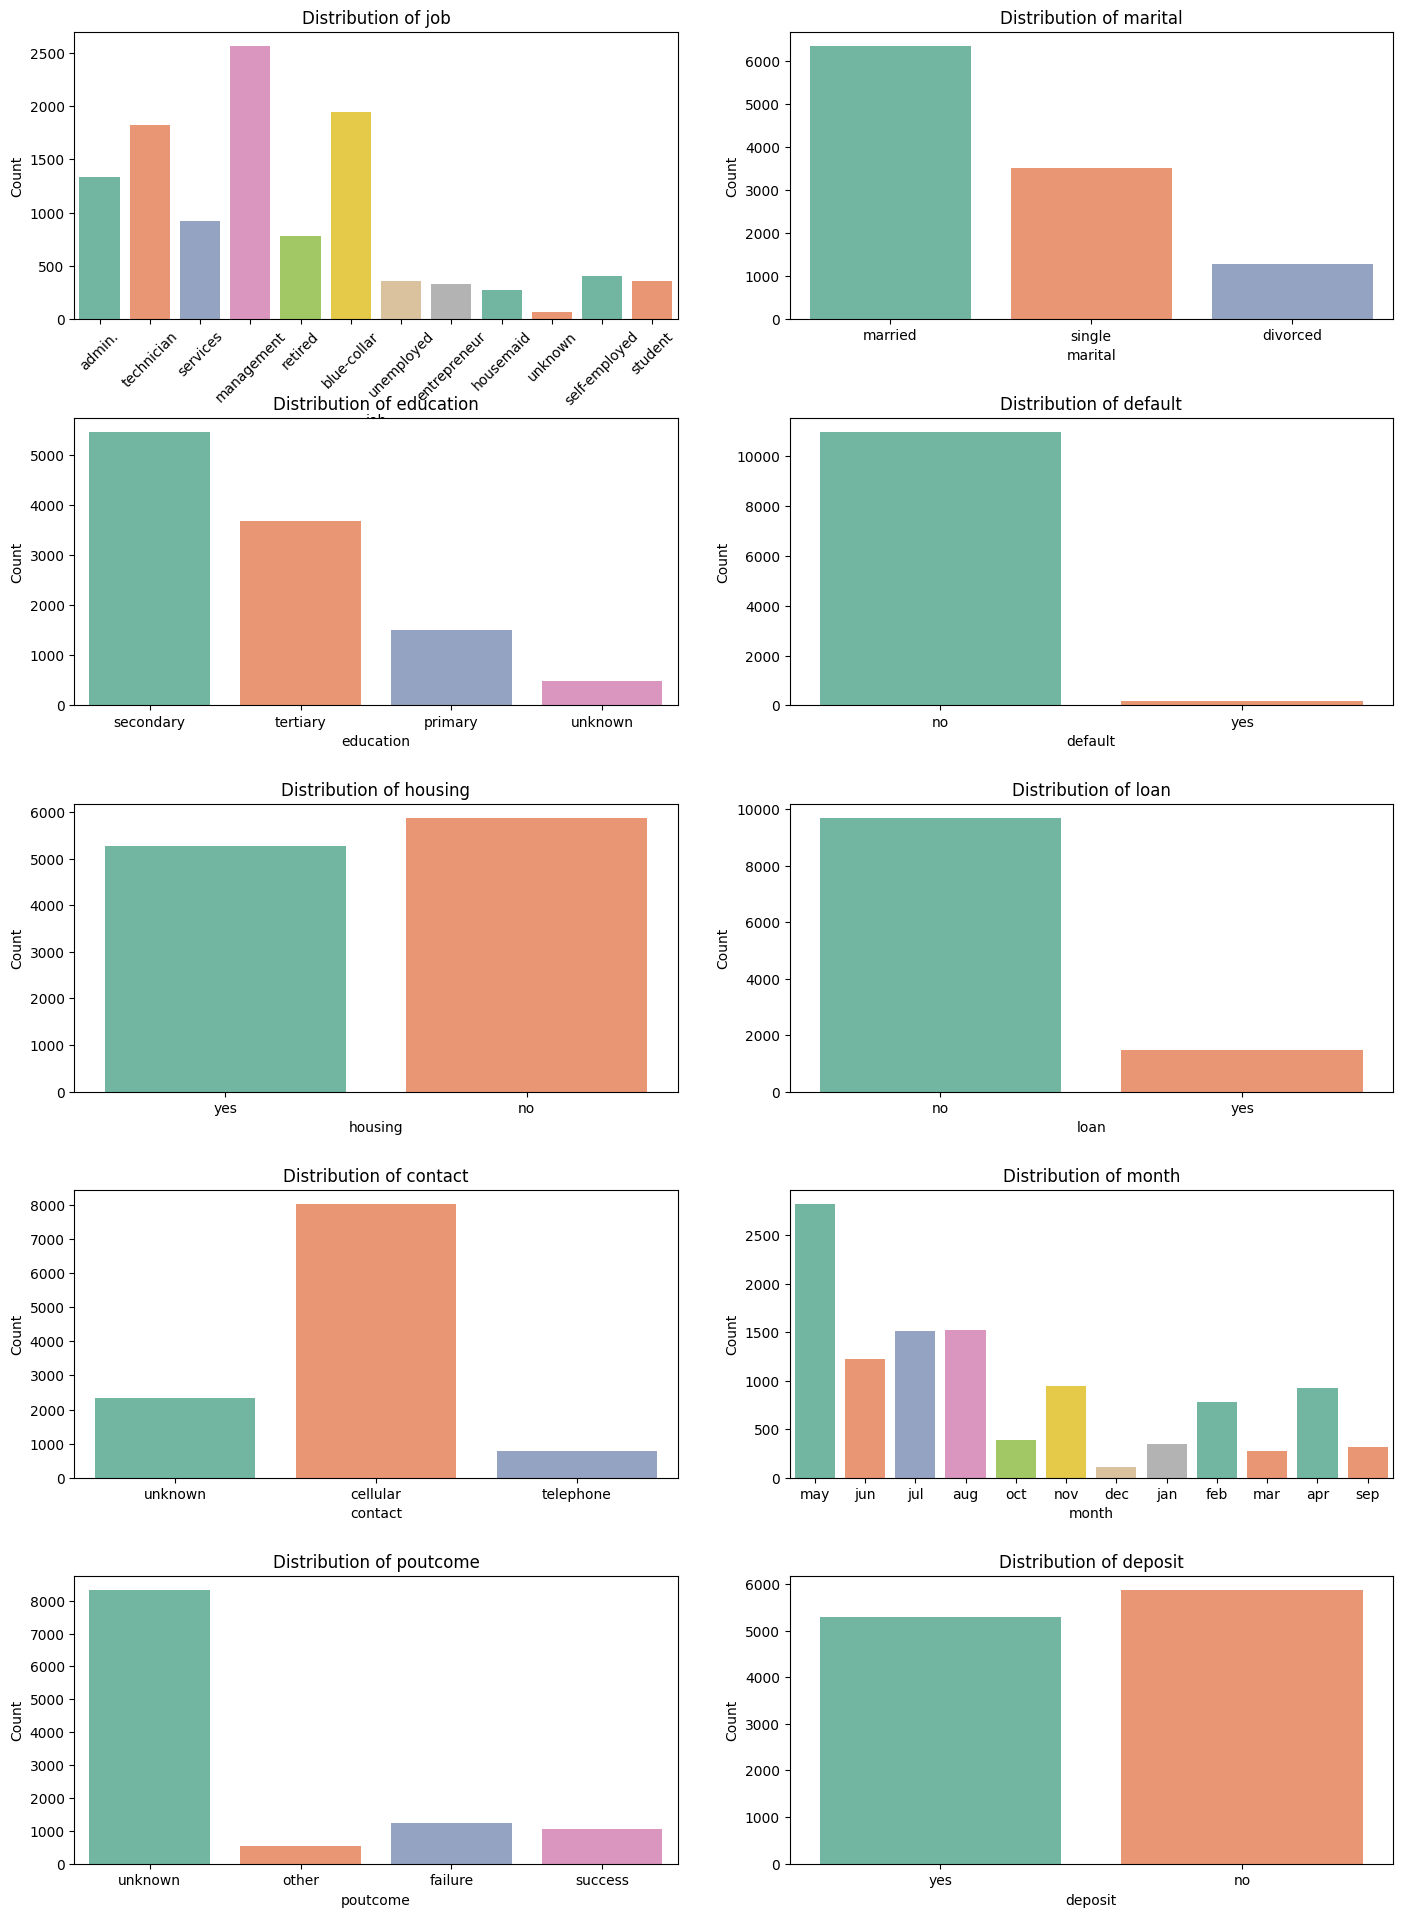

In [ ]:
# Ignore warnings for cleaner output
warnings.filterwarnings('ignore')

# Define categorical columns to be visualized
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']
palette = sns.color_palette("Set2", len(categorical_columns))  # Generate a color palette for the plots

# Create subplots for count plots of each categorical column
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(15, 20))
fig.tight_layout(pad=5.0)  # Adjust layout for better spacing between plots

# Iterate through each axis and corresponding categorical column
for ax, column in zip(axes.flatten(), categorical_columns):
    sns.countplot(data=df, x=column, ax=ax, palette=palette)  # Create a count plot for the column
    ax.set_title(f'Distribution of {column}')  # Set the title for each subplot
    ax.set_xlabel(column)  # Label the x-axis with the column name
    ax.set_ylabel('Count')  # Label the y-axis as 'Count'

# Rotate x-axis ticks for better visibility on the first subplot
axes[0, 0].tick_params(axis='x', rotation=45)
plt.show()  # Display the count plots


### Key Observations from Data Distribution

- **Job**: Common jobs are blue-collar, management, and technician; less common roles include student, unknown, and self-employed.

- **Marital Status**: Majority are married, followed by single individuals, with divorced being the smallest group.

- **Education**: Secondary education is most common, followed by tertiary; primary and unknown are least common.

- **Default**: Few individuals have a credit default; the majority are marked as "no."

- **Housing Loan**: Balanced distribution between those with and without housing loans.

- **Personal Loan**: Most individuals do not have a personal loan.

- **Contact**: Cellular is the primary contact method, followed by unknown, with telephone being the least used.

- **Month**: Most contacts happened in May, followed by July, August, and October, with the fewest in March.

- **Poutcome**: Majority of past campaign outcomes are unknown; failures outnumber successes among known outcomes.

- **Deposit**: Nearly even distribution between those who made a deposit and those who didn’t.

### Summary of Trends

- **Influence of Job and Marital Status**: Job and marital status likely influence other variables due to high frequencies.
- **Financial Stability**: Default, loan, and housing variables may relate to financial stability, as seen in balance data.
- **Contact Method**: High frequency of cellular contact suggests it may be the most effective communication method.


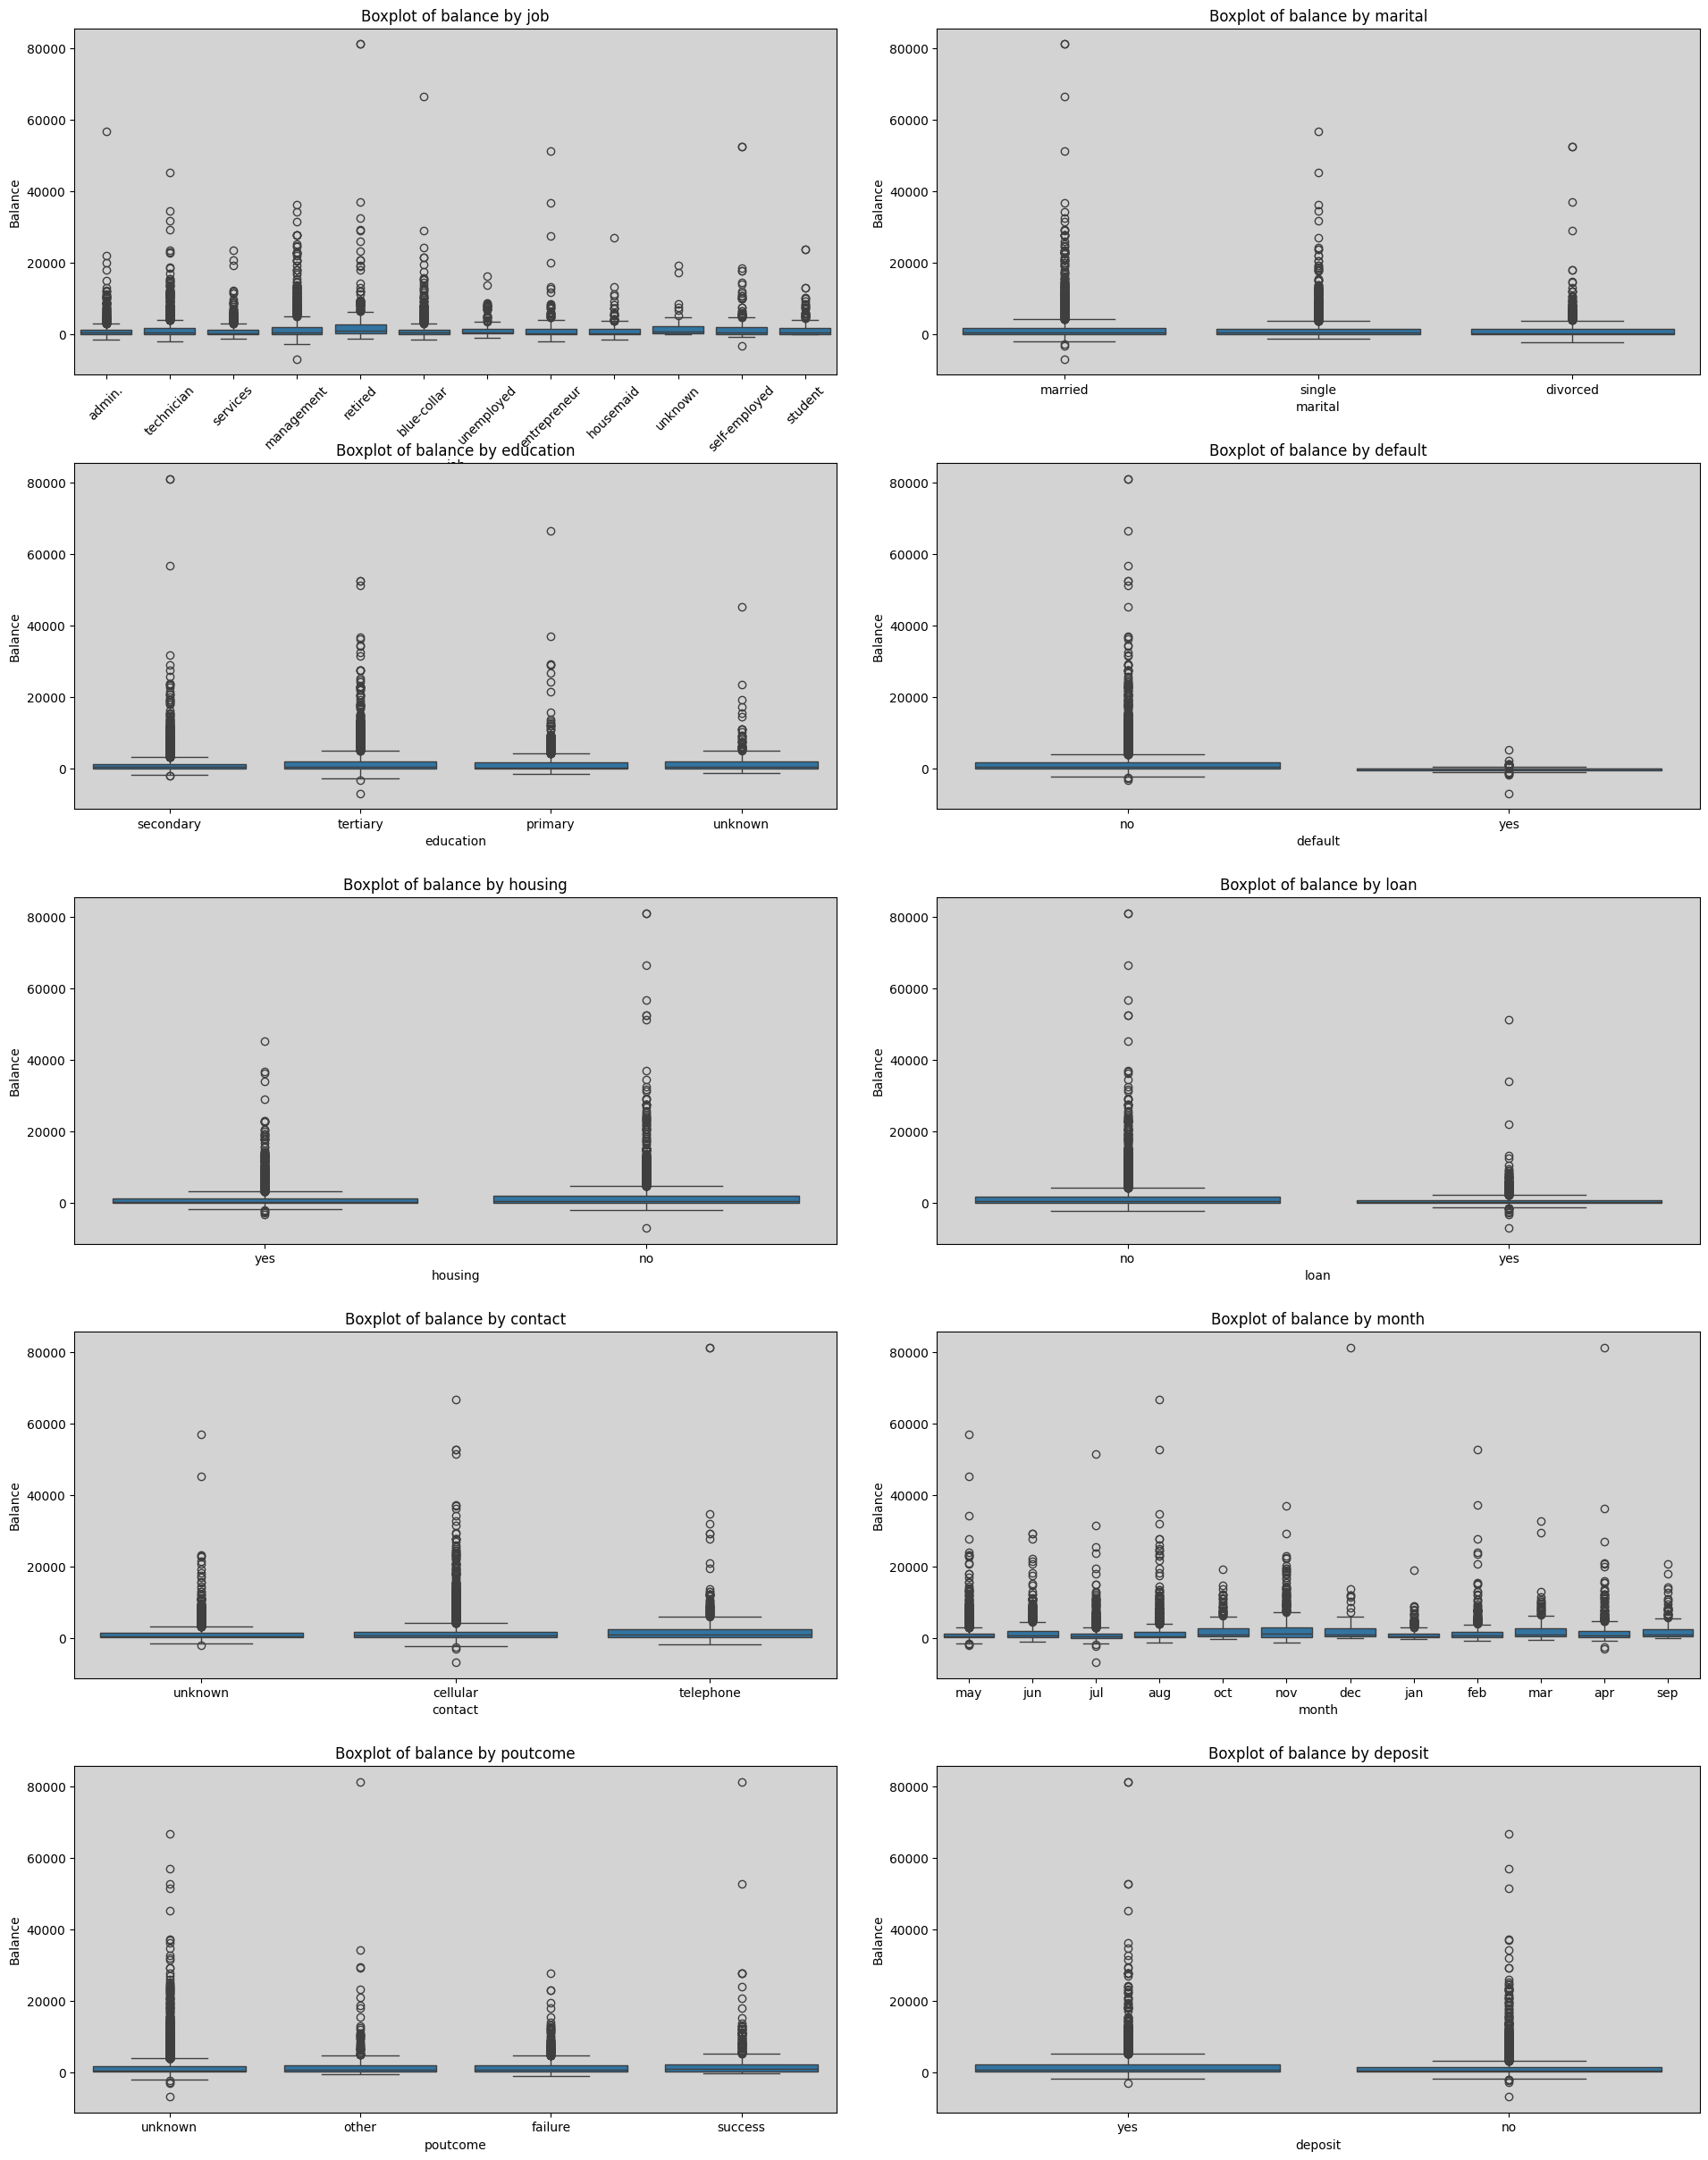

In [ ]:
# Create subplots for boxplots of 'balance' by each categorical column
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))
fig.tight_layout(pad=5.0)  # Adjust layout for better spacing between plots

# Iterate through each axis and corresponding categorical column
for ax, column in zip(axes.flatten(), categorical_columns):
    sns.boxplot(data=df, x=column, y='balance', ax=ax)  # Create a boxplot of 'balance' against the categorical variable
    ax.set_title(f'Boxplot of balance by {column}')  # Set the title for each subplot
    ax.set_facecolor('lightgrey')  # Set the background color of the subplot
    ax.set_xlabel(column)  # Label the x-axis with the column name
    ax.set_ylabel('Balance')  # Label the y-axis as 'Balance'
    
# Rotate x-axis ticks for better visibility on the first subplot
axes[0, 0].tick_params(axis='x', rotation=45)

plt.show()  # Display the box plots


### Insights on Balance Variations

- **Job Category**: Higher median balances seen in "retired" and "management" categories, while "student" and "blue-collar" show lower balances. Notable outliers in "management" and "retired."

- **Marital Status**: Similar median balances across marital statuses, with more outliers in the "married" group.

- **Education Level**: Median balances are comparable across education levels, though "tertiary" education has more high-balance outliers.

- **Default Status**: Individuals with "no" default status have higher balances, with fewer outliers in the "yes" category.

- **Housing Loan**: Those without housing loans have slightly higher balances and more outliers compared to those with loans.

- **Personal Loan**: Similar pattern to housing loans; those without personal loans generally show higher balances with more high-balance outliers.

- **Contact Method**: Minimal balance differences by contact method, though "telephone" includes a few high-balance outliers.

- **Month of Contact**: Variation in balances across months, with May and October having more high-balance outliers.

- **Previous Campaign Outcome (Poutcome)**: "Success" outcomes are associated with higher balances; all categories, especially "unknown," contain significant outliers.

- **Deposit Subscription**: Higher median balances seen in those who did not subscribe, with more high-balance outliers in the "no" group.

### Summary
Some factors, like job type and previous campaign outcomes, show significant balance variation, while others, such as marital status and education level, display less median variation but include substantial outliers.


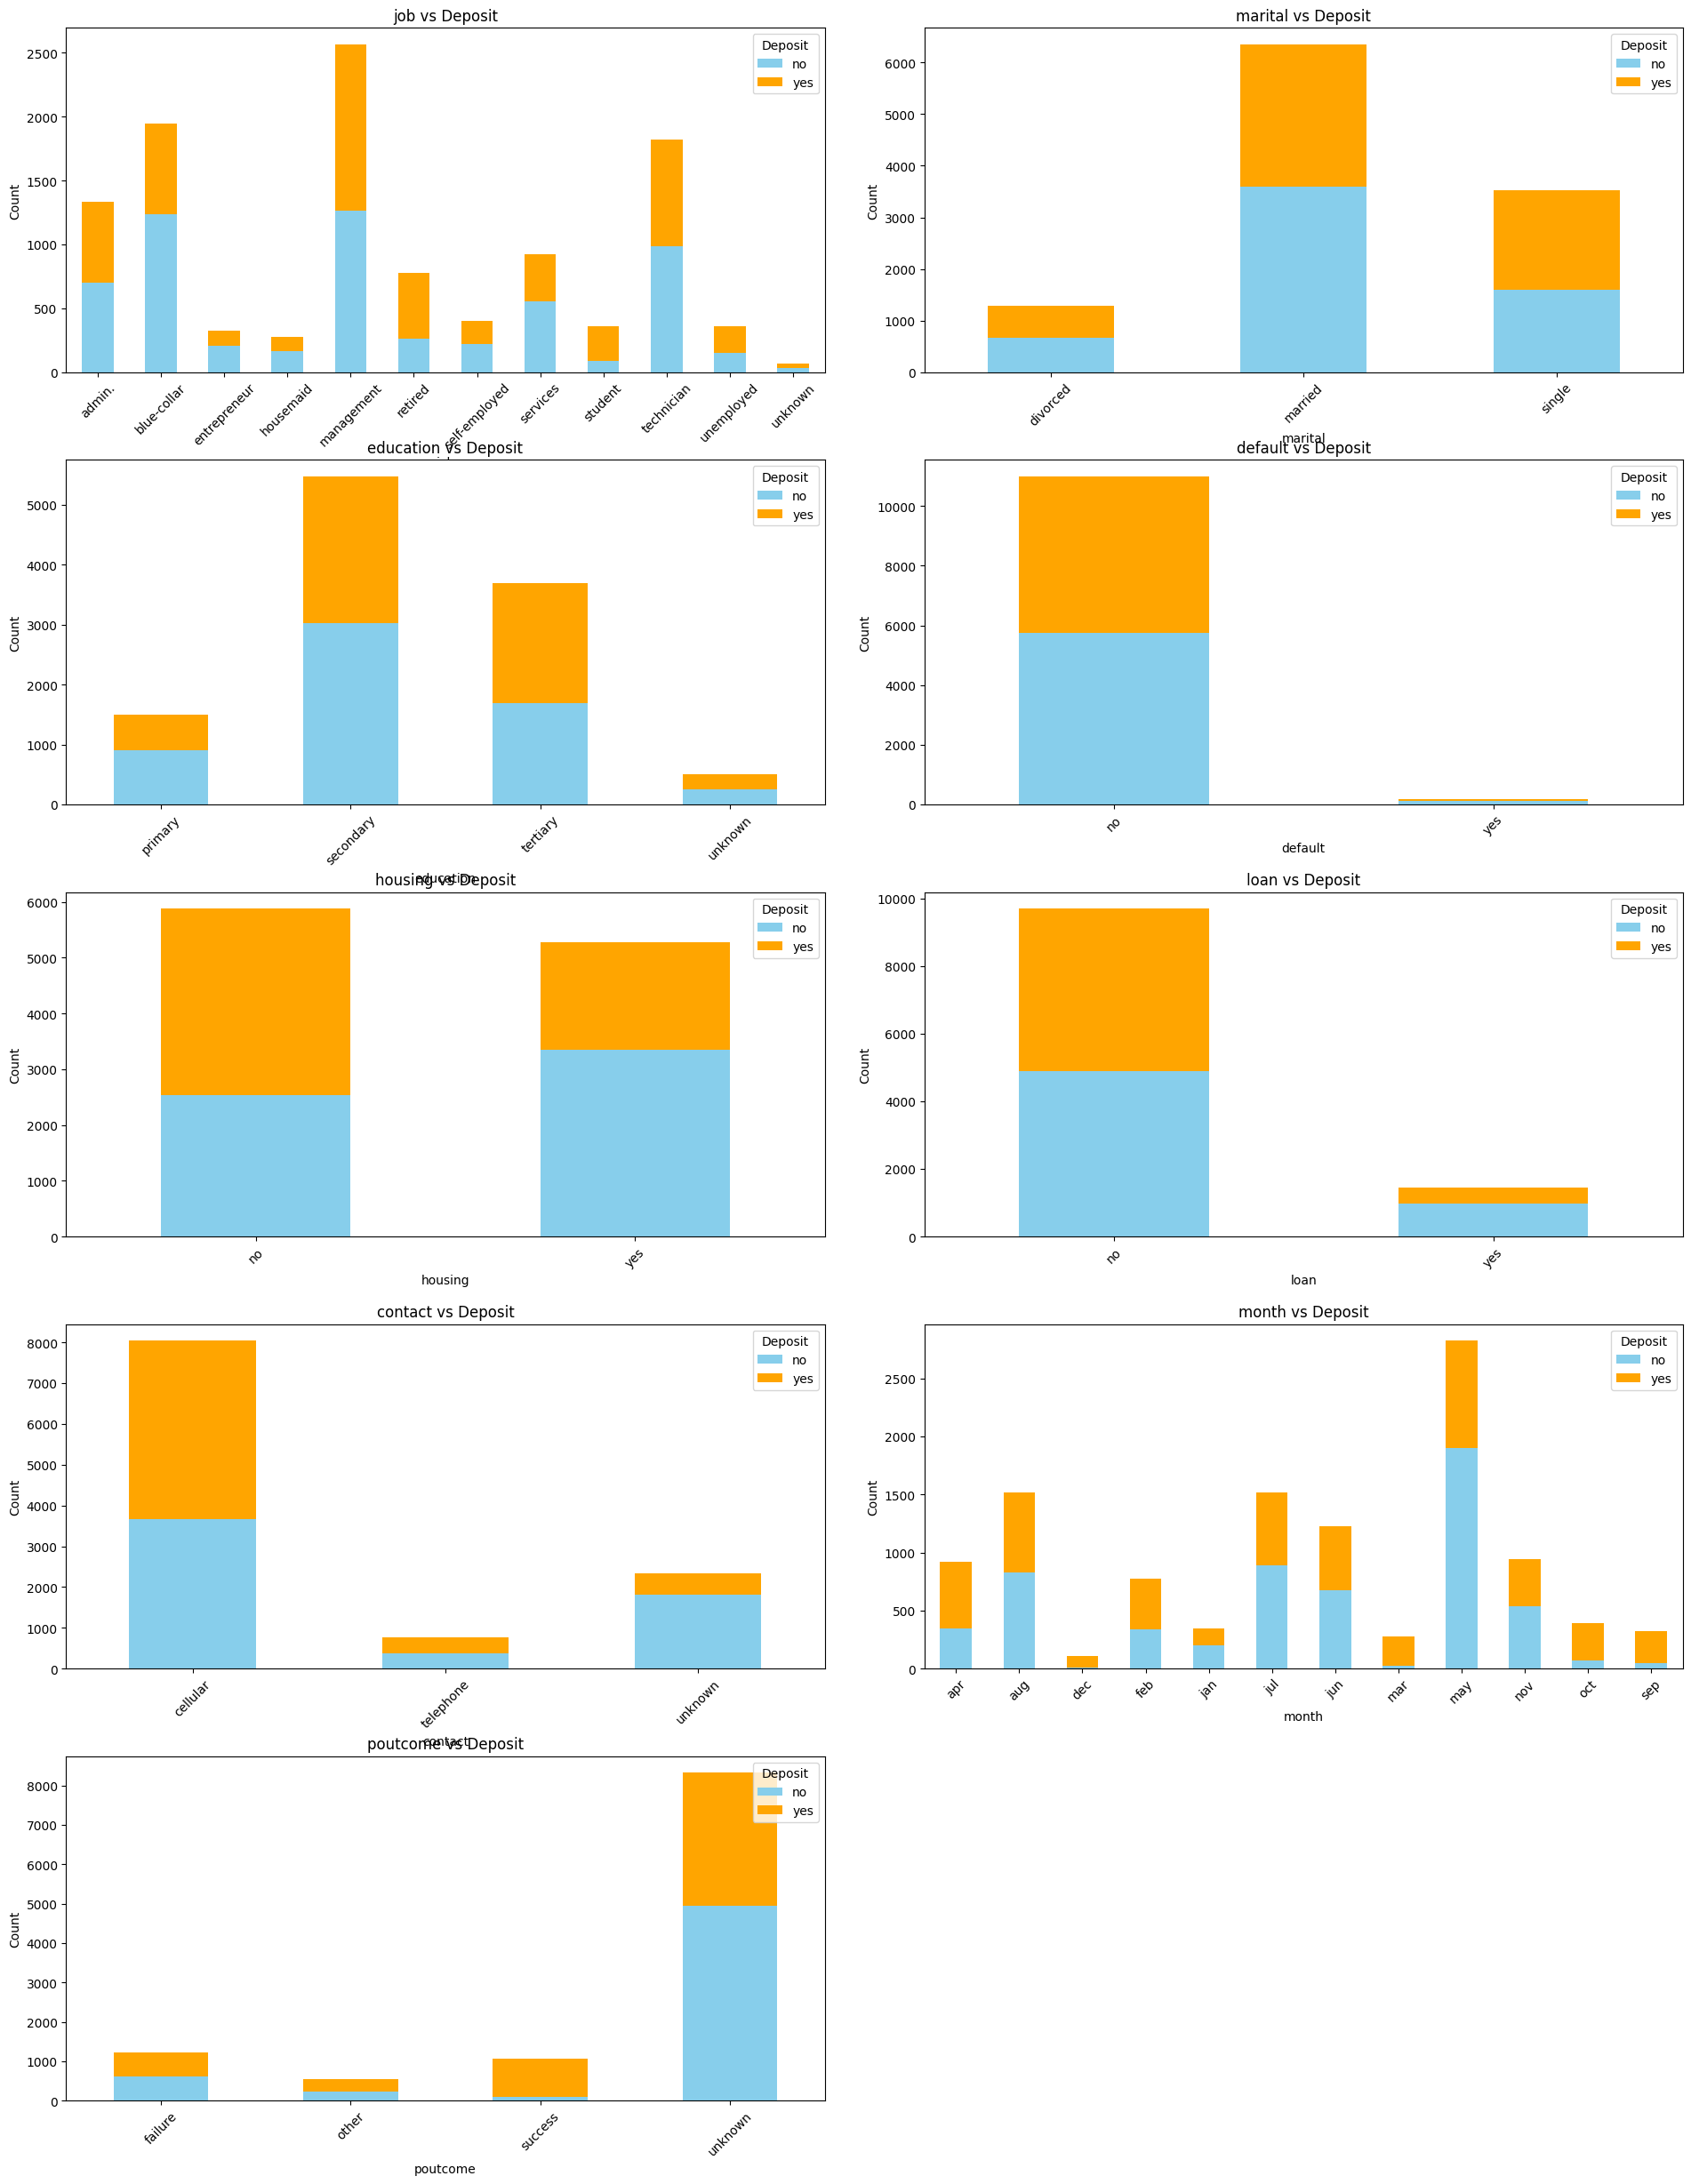

In [ ]:
# Create subplots for stacked bar plots showing the relationship between each categorical column and 'deposit'
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(20, 25))
fig.tight_layout(pad=5.0)  # Adjust layout for better spacing between plots
fig.delaxes(axes.flatten()[-1])  # Remove the last empty subplot

# Iterate through each axis and corresponding categorical column
for ax, column in zip(axes.flatten(), categorical_columns):
    # Group the data by the categorical column and 'deposit', then count occurrences
    deposit_counts = df.groupby([column, 'deposit']).size().unstack().fillna(0)
    # Create a stacked bar plot for the counts of 'deposit' per category
    deposit_counts.plot(kind='bar', stacked=True, ax=ax, color=['skyblue', 'orange'])
    ax.set_title(f'{column} vs Deposit')  # Set the title for each subplot
    ax.set_xlabel(column)  # Label the x-axis with the column name
    ax.set_ylabel('Count')  # Label the y-axis as 'Count'
    ax.tick_params(axis='x', rotation=45)  # Rotate x-axis ticks for better visibility
    ax.legend(title='Deposit', loc='upper right')  # Add a legend indicating 'Deposit' status

plt.show()  # Display the stacked bar plots


### Deposit Subscription Insights

- **Job vs Deposit**: Higher subscription rates in "management" and "retired"; lower in "student" and "blue-collar."

- **Marital Status vs Deposit**: Married individuals have more deposit subscriptions than single or divorced individuals.

- **Education vs Deposit**: Higher subscription likelihood among tertiary-educated individuals, followed by secondary.

- **Default vs Deposit**: Nearly all subscriptions come from individuals with no default history.

- **Housing Loan vs Deposit**: Those without housing loans are more likely to subscribe.

- **Loan vs Deposit**: Individuals without personal loans show more deposit subscriptions.

- **Contact Method vs Deposit**: "Cellular" contact is associated with more subscriptions than "telephone."

- **Month vs Deposit**: May has the highest number of subscriptions, indicating possible seasonality.

- **Poutcome vs Deposit**: Successful previous campaign outcomes correlate with more subscriptions.

### Summary
Factors like job, education, and previous campaign success strongly influence deposit subscriptions and balance distribution.


Removing outliers using IQR method

In [ ]:
def remove_outliers(df, columns):
    # Loop through each specified column to identify and remove outliers
    for column in columns:
        Q1 = df[column].quantile(0.25)  # Calculate the first quartile
        Q3 = df[column].quantile(0.75)  # Calculate the third quartile
        IQR = Q3 - Q1  # Compute the interquartile range
        lower_bound = Q1 - 1.5 * IQR  # Define the lower bound for outlier detection
        upper_bound = Q3 + 1.5 * IQR  # Define the upper bound for outlier detection
        # Filter the DataFrame to exclude outliers
        df = df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]
    return df  # Return the DataFrame without outliers

# Select all numerical columns (int and float types) from the DataFrame
all_columns = df.select_dtypes(include=['int64', 'float64']).columns
# Remove outliers from the original DataFrame
df1 = remove_outliers(df, all_columns)
df1  # Display the DataFrame after outlier removal


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes
5,42,management,single,tertiary,no,0,yes,yes,unknown,5,may,562,2,-1,0,unknown,yes
8,37,technician,married,secondary,no,1,yes,no,unknown,6,may,608,1,-1,0,unknown,yes
10,38,admin.,single,secondary,no,100,yes,no,unknown,7,may,786,1,-1,0,unknown,yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,34,blue-collar,single,secondary,no,-72,yes,no,cellular,7,jul,273,5,-1,0,unknown,no
11157,33,blue-collar,single,primary,no,1,yes,no,cellular,20,apr,257,1,-1,0,unknown,no
11158,39,services,married,secondary,no,733,no,no,unknown,16,jun,83,4,-1,0,unknown,no
11159,32,technician,single,secondary,no,29,no,no,cellular,19,aug,156,2,-1,0,unknown,no


After removing all the outliers, the dataset has reduced to around 6500 rows.

Encoding all the categorical values.

In [ ]:
# List of categorical columns to be encoded
categorical_columns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'poutcome', 'deposit']

label_encoder = LabelEncoder()  # Initialize the LabelEncoder for encoding categorical variables
df2 = df1.copy()  # Create a copy of the DataFrame without outliers for encoding

# Iterate through each categorical column to apply label encoding
for column in categorical_columns:
    df2[column] = label_encoder.fit_transform(df1[column])  # Encode the column values as integers

df2  # Display the DataFrame after encoding categorical variables


,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,0,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,0,1
5,42,4,2,2,0,0,1,1,2,5,8,562,2,-1,0,0,1
8,37,9,1,1,0,1,1,0,2,6,8,608,1,-1,0,0,1
10,38,0,2,1,0,100,1,0,2,7,8,786,1,-1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,34,1,2,1,0,-72,1,0,0,7,5,273,5,-1,0,0,0
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,0,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,0,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,0,0


I encoded the categorical columns using **LabelEncoder** to a new dataframe **df2**

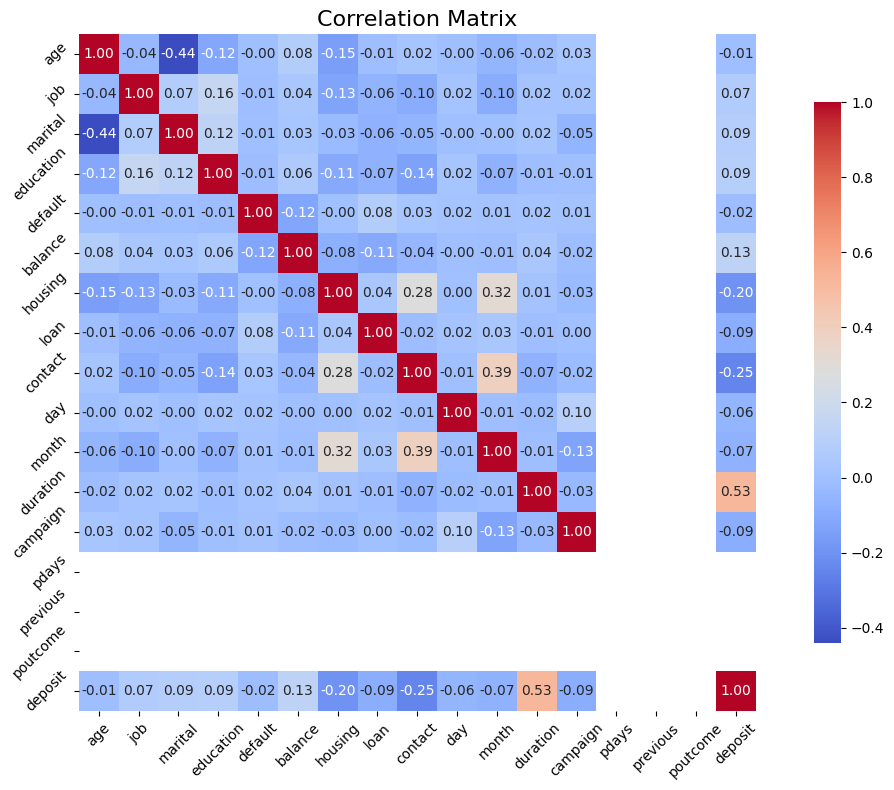

In [ ]:
# Calculate the correlation matrix for the DataFrame
correlation_matrix = df2.corr()

# Set the size of the plot for better visibility
plt.figure(figsize=(12, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm', square=True, cbar_kws={"shrink": .8})

# Add a title and adjust the font size
plt.title('Correlation Matrix', fontsize=16)
plt.xticks(rotation=45)  # Rotate x-axis labels for better readability
plt.yticks(rotation=45)  # Rotate y-axis labels for better readability

# Optimize the layout and display the plot
plt.tight_layout()
plt.show()  # Show the heatmap


Now there is very less correlation between the columns of the data

In [28]:
df2

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,0,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,0,1
5,42,4,2,2,0,0,1,1,2,5,8,562,2,-1,0,0,1
8,37,9,1,1,0,1,1,0,2,6,8,608,1,-1,0,0,1
10,38,0,2,1,0,100,1,0,2,7,8,786,1,-1,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
11156,34,1,2,1,0,-72,1,0,0,7,5,273,5,-1,0,0,0
11157,33,1,2,0,0,1,1,0,0,20,0,257,1,-1,0,0,0
11158,39,7,1,1,0,733,0,0,2,16,6,83,4,-1,0,0,0
11159,32,9,2,1,0,29,0,0,0,19,1,156,2,-1,0,0,0


 ### Q2<br>
 Select metrics that you will use, such as accuracy, F1 score, balanced accuracy, AUC etc. and state the reason
 for the choice.

 **Primary Metrics:** *F1 Score* and *Balanced Accuracy* should be your primary focus due to their robustness in imbalanced settings.

**Supplementary Metric:** *AUC-ROC* can provide additional insights into the model's performance, especially when exploring different thresholds.

### Q3

## a. Continuous Variables: Use as Is, Normalize, or Transform?

1. **Use as Is**:
   - If the continuous variables (e.g., age, balance) are already in a suitable range and scale for your model, you can use them directly.

2. **Normalization**:
   - **Why**: Normalize continuous variables (e.g., Min-Max scaling) when the model you’re using is sensitive to the scale of the data, such as in algorithms like k-nearest neighbors or neural networks. Normalization ensures that all features contribute equally to distance calculations.
   - **When to Normalize**: If the variable has a wide range or includes outliers, normalization helps bring the values to a similar scale (0 to 1) without distorting differences in the ranges.

3. **Transformation**:
   - **Why**: Consider transformations (e.g., log transformation) if the data is skewed or has outliers. This can help stabilize variance and make the data more normally distributed, which is beneficial for models that assume normality.
   - **When to Transform**: For example, if the balance variable has a long right tail (many low balances and a few very high ones), a log transformation can help reduce skewness.

## b. Discrete Variables: Use All Values or Reduce by Combining?

1. **Using All Values**:
   - If the discrete variables (e.g., job, marital status) have a manageable number of unique categories and are informative, you can use them as is. Encoding can be done using one-hot encoding or label encoding based on the algorithm.

2. **Reducing by Combining Values**:
   - **Why**: If certain categories have very few occurrences or are similar, consider combining them to reduce dimensionality and avoid overfitting.
   - **When to Combine**: For example, if "student" and "retired" categories in the job variable are infrequent compared to "management" and "blue-collar," you might combine these lesser categories into an "Other" category.

3. **Encoding**:
   - Use techniques like one-hot encoding for nominal variables (e.g., job) and label encoding for ordinal variables (e.g., education level).

## c. Unreliable, Noisy, or Immaterial Variables

1. **Identifying Unreliable Variables**:
   - **Analysis**: Conduct exploratory data analysis (EDA) to examine each variable’s distribution, variance, and correlation with the target variable. Variables with high missing values, low variance, or weak correlations with the target may be less reliable.
   - **Examples**: If a variable like "contact" has high levels of "unknown," it may not provide useful information and could be removed.

2. **Noise in Data**:
   - Some variables may contain random variations that do not contribute to the model's predictive power. Noise can be identified through outlier detection methods or by analyzing the residuals of your model.

3. **Immaterial Variables**:
   - Features that do not have a clear relationship with the target variable should be considered for removal. For example, if "day" or "month" of contact does not show any significant correlation with deposit subscription, you might choose to exclude them.

## Summary of Strategy
- **Continuous Variables**: Normalize if needed, consider transformations for skewed data.
- **Discrete Variables**: Combine infrequent categories and encode appropriately.
- **Unreliable Variables**: Remove features with high noise, low correlation, or that do not provide useful information.

By following this strategy, you can effectively prepare your data for modeling, enhancing the performance and interpretability of your machine learning algorithms.


In [ ]:
from sklearn.model_selection import train_test_split  # Import the train_test_split function for splitting data

# Define the features (X) by dropping the target variable 'deposit'
X = df2.drop('deposit', axis=1)
# Define the target variable (y)
y = df2['deposit']

# Split the data into training and testing sets with stratification to maintain class distribution
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

# Check the class distribution in the test set and display normalized counts
print(y_test.value_counts(normalize=True))


deposit
0    0.631538
1    0.368462
Name: proportion, dtype: float64


### Q4
### Should the Test Data Be Balanced?

1. **Real-World Representation**:
   - The test data should ideally reflect the real-world distribution of the classes. If your dataset is imbalanced (as indicated by your output, where Class 0 is ~63% and Class 1 is ~37%), the test set should maintain this imbalance. This allows you to assess how well the model performs in practical scenarios where the class distribution may not be even.

2. **Purpose of Testing**:
   - The primary purpose of the test data is to evaluate the model's performance on unseen data. If you artificially balance the test set, you might get misleading performance metrics that do not accurately reflect how the model will perform in real-world applications.

3. **Metrics Selection**:
   - When dealing with imbalanced datasets, it’s crucial to use evaluation metrics that account for the class imbalance, such as:
     - **Precision, Recall, and F1 Score**: These metrics provide a better understanding of model performance, especially on the minority class.
     - **ROC-AUC**: This metric evaluates the model's ability to distinguish between classes across different thresholds and is less affected by class imbalance.

4. **Training vs. Test Balance**:
   - While you can use techniques like oversampling or undersampling to balance the training set (which can help improve the model's ability to learn from the minority class), the test set should remain representative of the actual data distribution.

### Conclusion

In summary, **the test data should not be artificially balanced**. It should reflect the true distribution of the classes as found in the original dataset. This approach will provide a more accurate assessment of the model's performance and ensure that the results are meaningful when deployed in a real-world setting.

### Recommendation

- Keep the test set imbalanced if the training data is also imbalanced.
- Use stratified sampling to maintain the original distribution during the train-test split.
- Focus on the appropriate evaluation metrics that can provide insights into how well the model handles the imbalance.


In [ ]:
# Define the features (X) by dropping the target variable 'deposit'
X = df2.drop('deposit', axis=1)
# Define the target variable (y)
y = df2['deposit']

# Split the data into temporary training and testing sets (80% train, 20% test)
X_temp, X_test, y_temp, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Further split the temporary training set into training (60% of total) and validation sets (20% of total)
X_train, X_val, y_train, y_val = train_test_split(X_temp, y_temp, test_size=0.25, random_state=42)

# Display the shapes of the training, validation, and testing sets
X_train.shape, X_val.shape, X_test.shape, y_train.shape, y_val.shape, y_test.shape


((3898, 16), (1300, 16), (1300, 16), (3898,), (1300,), (1300,))

### Q5(a) Support Vector Machine

In [ ]:
from sklearn.svm import SVC  # Import Support Vector Classifier
from sklearn.metrics import accuracy_score  # Import accuracy score function to evaluate model performance

# Initialize the Support Vector Classifier with a fixed random state for reproducibility
svm = SVC(random_state=42)

# Fit the SVM model to the training data
svm.fit(X_train, y_train)

# Make predictions on the test set
y_pred_svm = svm.predict(X_test)

# Calculate training accuracy by comparing predicted values with actual values in the training set
accuracy_svm_train = accuracy_score(y_train, svm.predict(X_train))
# Calculate test accuracy by comparing predicted values with actual values in the test set
accuracy_svm_test = accuracy_score(y_test, y_pred_svm)

# Print training and test accuracy rounded to two decimal places
print(f"Training Accuracy: {round(accuracy_svm_train, 2)}")
print(f"Test Accuracy: {round(accuracy_svm_test, 2)}")


Training Accuracy: 0.76
Test Accuracy: 0.76


### Q5(b) Neural Networks

In [ ]:
from sklearn.neural_network import MLPClassifier  # Import Multi-layer Perceptron Classifier
from sklearn.metrics import accuracy_score  # Import accuracy score function to evaluate model performance

# Define the neural network model with specified hyperparameters
nn = MLPClassifier(hidden_layer_sizes=(50,),   # Single hidden layer with 50 neurons (can be adjusted)
                   activation='relu',          # Use ReLU as the activation function
                   solver='adam',              # Specify Adam as the optimization solver
                   alpha=0.0001,               # L2 penalty (weight decay), adjustable hyperparameter
                   random_state=42,            # Fixed random state for reproducibility
                   max_iter=500)               # Maximum number of iterations for training

# Train the neural network model on the training data
nn.fit(X_train, y_train)

# Make predictions on the training, validation, and test sets
y_pred_train_nn = nn.predict(X_train)
y_pred_val_nn = nn.predict(X_val)
y_pred_test_nn = nn.predict(X_test)

# Calculate accuracy for training, validation, and test sets
accuracy_nn_train = accuracy_score(y_train, y_pred_train_nn)
accuracy_nn_val = accuracy_score(y_val, y_pred_val_nn)
accuracy_nn_test = accuracy_score(y_test, y_pred_test_nn)

# Print the accuracy results rounded to two decimal places
print(f"Training Accuracy: {round(accuracy_nn_train, 2)}")
print(f"Validation Accuracy: {round(accuracy_nn_val, 2)}")
print(f"Test Accuracy: {round(accuracy_nn_test, 2)}")


Training Accuracy: 0.79
Validation Accuracy: 0.78
Test Accuracy: 0.79


In [32]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import RandomizedSearchCV

# Define the parameter grid for RandomizedSearchCV
param_grid_nn = {
    'hidden_layer_sizes': [(50,), (100,), (50, 50), (100, 50)],  # Different configurations of hidden layer(s) and neurons
    'alpha': [0.0001, 0.001, 0.01, 0.1],                        # Weight decay (L2 penalty)
    'learning_rate_init': [0.001, 0.01, 0.1],                    # Initial learning rate
    'max_iter': [200, 300, 400, 500]                             # Number of iterations
}

# Initialize the MLPClassifier
nn = MLPClassifier(activation='relu', solver='adam', random_state=42)

# Set up RandomizedSearchCV
nn_random = RandomizedSearchCV(estimator=nn, param_distributions=param_grid_nn, n_iter=50, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model
nn_random.fit(X_train, y_train)

# Get the best parameters
best_params_nn = nn_random.best_params_
best_params_nn


Fitting 3 folds for each of 50 candidates, totalling 150 fits


{'max_iter': 500,
 'learning_rate_init': 0.1,
 'hidden_layer_sizes': (100, 50),
 'alpha': 0.01}

In [33]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score

# Create a new MLPClassifier using the best parameters found
best_nn = MLPClassifier(**best_params_nn, random_state=42)

# Train the model on the training data
best_nn.fit(X_train, y_train)

# Make predictions on training, validation, and test sets
y_pred_best_nn_train = best_nn.predict(X_train)
y_pred_best_nn_val = best_nn.predict(X_val)
y_pred_best_nn_test = best_nn.predict(X_test)

# Calculate accuracy for training, validation, and test sets
accuracy_best_nn_train = accuracy_score(y_train, y_pred_best_nn_train)
accuracy_best_nn_val = accuracy_score(y_val, y_pred_best_nn_val)
accuracy_best_nn_test = accuracy_score(y_test, y_pred_best_nn_test)

# Print the accuracies
print(f"Training Accuracy: {round(accuracy_best_nn_train, 2)}")
print(f"Validation Accuracy: {round(accuracy_best_nn_val, 2)}")
print(f"Test Accuracy: {round(accuracy_best_nn_test, 2)}")


Training Accuracy: 0.77
Validation Accuracy: 0.77
Test Accuracy: 0.77


### Q5(c) Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest Classifier

# Initialize the Random Forest Classifier with a fixed random state for reproducibility
rf = RandomForestClassifier(random_state=42)

# Train the Random Forest model on the training data
rf.fit(X_train, y_train)

# Make predictions on the validation and test sets
y_pred = rf.predict(X_val)
y_pred_test = rf.predict(X_test)

# Calculate accuracy for training, validation, and test sets
accuracy_rf_train = (rf.predict(X_train) == y_train).mean()  # Training accuracy
accuracy_rf_val = (y_pred == y_val).mean()                   # Validation accuracy
accuracy_rf_test = (y_pred_test == y_test).mean()            # Test accuracy

# Print the accuracy results, rounding validation and test accuracy to two decimal places
print(f"Training Accuracy: {accuracy_rf_train}")
print(f"Validation Accuracy: {round(accuracy_rf_val, 2)}")
print(f"Test Accuracy: {round(accuracy_rf_test, 2)}")


Training Accuracy: 1.0
Validation Accuracy: 0.83
Test Accuracy: 0.85


Random Forest gives an accuracy of 0.83 on tha validata data, let us try to tune the hyperparamter to increase its accuracy.

I will use RandomisedSearchCV to hyperparmater tune it

In [ ]:
from sklearn.model_selection import RandomizedSearchCV  # Import RandomizedSearchCV for hyperparameter tuning

# Define the parameter grid for Random Forest hyperparameters to explore
param_grid = {
    'n_estimators': [100, 200, 300, 400, 500],         # Number of trees in the forest
    'max_features': ['auto', 'sqrt', 'log2'],          # Number of features to consider for the best split
    'max_depth': [None, 10, 20, 30, 40, 50],           # Maximum depth of the tree
    'min_samples_split': [2, 5, 10],                   # Minimum number of samples required to split an internal node
    'min_samples_leaf': [1, 2, 4],                     # Minimum number of samples required to be at a leaf node
    'bootstrap': [True, False]                          # Whether bootstrap samples are used when building trees
}

# Initialize the RandomizedSearchCV with the Random Forest estimator and parameter grid
rf_random = RandomizedSearchCV(estimator=rf, param_distributions=param_grid, 
                               n_iter=100, cv=3, verbose=2, random_state=42, n_jobs=-1)

# Fit the model on the training data to find the best hyperparameters
rf_random.fit(X_train, y_train)

# Retrieve the best hyperparameters from the random search
best_params = rf_random.best_params_
best_params


Fitting 3 folds for each of 100 candidates, totalling 300 fits


{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

In [36]:
best_params

{'n_estimators': 200,
 'min_samples_split': 10,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': 40,
 'bootstrap': False}

These are the paramaters that RandomisedSearchCV gave for a better model perfomance. Let's try to use those and check the accuracy of our RandomForest model.

In [ ]:
# Initialize the Random Forest Classifier with the best parameters from the random search
best_rf = RandomForestClassifier(**best_params, random_state=42)

# Fit the model on the training data
best_rf.fit(X_train, y_train)

# Make predictions on the validation and test sets
y_pred_best_rf = best_rf.predict(X_test)  # Predictions on test set
y_pred_val = best_rf.predict(X_val)        # Predictions on validation set

# Calculate accuracy for training, validation, and test sets
accuracy_best_rf_train = (best_rf.predict(X_train) == y_train).mean()  # Training accuracy
accuracy_best_rf_val = (y_pred_val == y_val).mean()                    # Validation accuracy
accuracy_best_rf = (y_pred_best_rf == y_test).mean()                   # Test accuracy

# Print the accuracy results, rounding to two decimal places
print(f"Training Accuracy: {round(accuracy_best_rf_train, 2)}")
print(f"Validation Accuracy: {round(accuracy_best_rf_val, 2)}")
print(f"Test Accuracy: {round(accuracy_best_rf, 2)}")


Training Accuracy: 0.99
Validation Accuracy: 0.83
Test Accuracy: 0.85


I had calculated the accuracy on test data on the previous model as well so to compare the accuracy scores for both the models. This is not the ideal way to do it.

There is no difference in the accuracy scores so we will stick to using the previous model itself.

### Curse of Dimensionality

The SVM model struggles with the curse of dimensionality due to several factors:

- **Data Sparsity in High Dimensions**: In high-dimensional spaces, data points become increasingly sparse. This sparsity means that even if classes are close in lower dimensions, they can be far apart in higher dimensions, complicating the task of finding a generalizable separating hyperplane.

- **Irrelevant Features**: Not all features contribute meaningful information for class separation. In high dimensions, SVMs may struggle to filter out irrelevant features, leading to poor model performance.

- **Challenge of Finding a Maximum Margin Hyperplane**: SVMs maximize the margin between classes. However, in high-dimensional spaces, defining a single margin-maximizing hyperplane is challenging due to the vast number of possible hyperplanes. This reduces SVM effectiveness as dimensionality increases.


### Q(6) Feature Importances

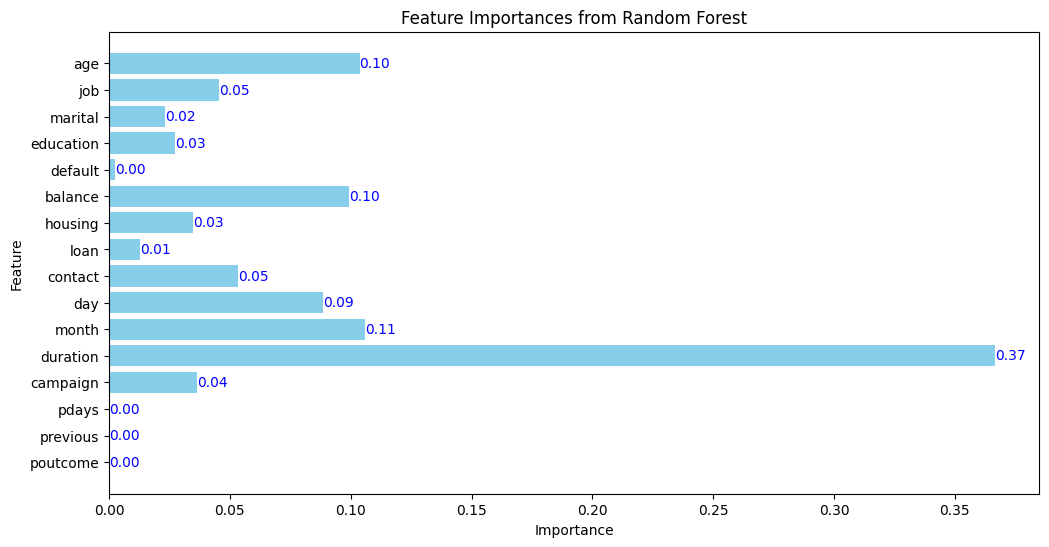

In [ ]:
# Get feature importances from the trained Random Forest model
importances = rf.feature_importances_  
feature_names = X.columns  # Get feature names from the DataFrame

# Set up the figure for the horizontal bar plot
plt.figure(figsize=(12, 6))

# Create a horizontal bar plot for feature importances
plt.barh(feature_names, importances, color='skyblue')
plt.xlabel('Importance')  # Label for the x-axis
plt.ylabel('Feature')     # Label for the y-axis
plt.title('Feature Importances from Random Forest')  # Title of the plot
plt.gca().invert_yaxis()  # Invert y-axis to display the most important feature at the top

# Annotate the bars with their importance values
for i, v in enumerate(importances):
    plt.text(v, i, f'{v:.2f}', color='blue', va='center')

# Display the plot
plt.show()


For models like neural networks and SVMs, interpreting feature importance is less straightforward than with tree-based models. However, there are common techniques to approximate feature importance or analyze feature impact:

1. **Permutation Importance**:
   - Measures how the model's accuracy drops when each feature’s values are randomly shuffled.
   - This technique works for any model, including neural networks and SVMs.

2. **SHAP (SHapley Additive exPlanations) Values**:
   - Provides feature importance scores based on Shapley values from cooperative game theory.
   - Works with any model and is a common choice for neural networks.

3. **Feature Coefficients (Linear SVM)**:
   - For linear SVM models, the coefficients of each feature indicate importance.
   - This approach isn’t feasible for non-linear kernels.


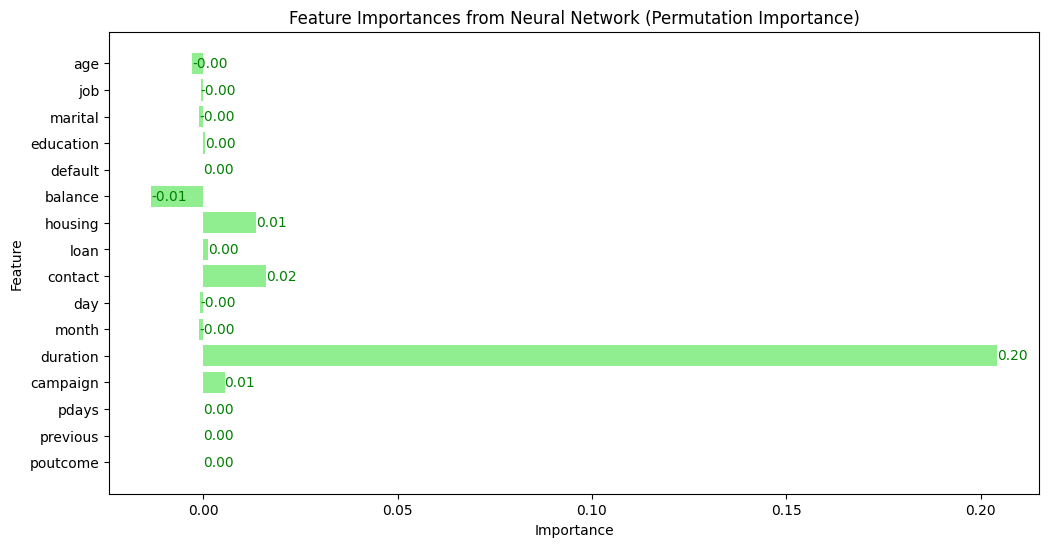

In [ ]:
from sklearn.inspection import permutation_importance
import matplotlib.pyplot as plt

# Calculate permutation importance for the trained Neural Network model
perm_importance_nn = permutation_importance(best_nn, X_test, y_test, n_repeats=10, random_state=42)
nn_importances = perm_importance_nn.importances_mean  # Get the mean importances

# Set up the figure for the horizontal bar plot
plt.figure(figsize=(12, 6))

# Create a horizontal bar plot for permutation importances of the Neural Network
plt.barh(feature_names, nn_importances, color='lightgreen')
plt.xlabel('Importance')  # Label for the x-axis
plt.ylabel('Feature')     # Label for the y-axis
plt.title('Feature Importances from Neural Network (Permutation Importance)')  # Title of the plot
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Annotate the bars with their importance values
for i, v in enumerate(nn_importances):
    plt.text(v, i, f'{v:.2f}', color='green', va='center')

# Display the plot
plt.show()


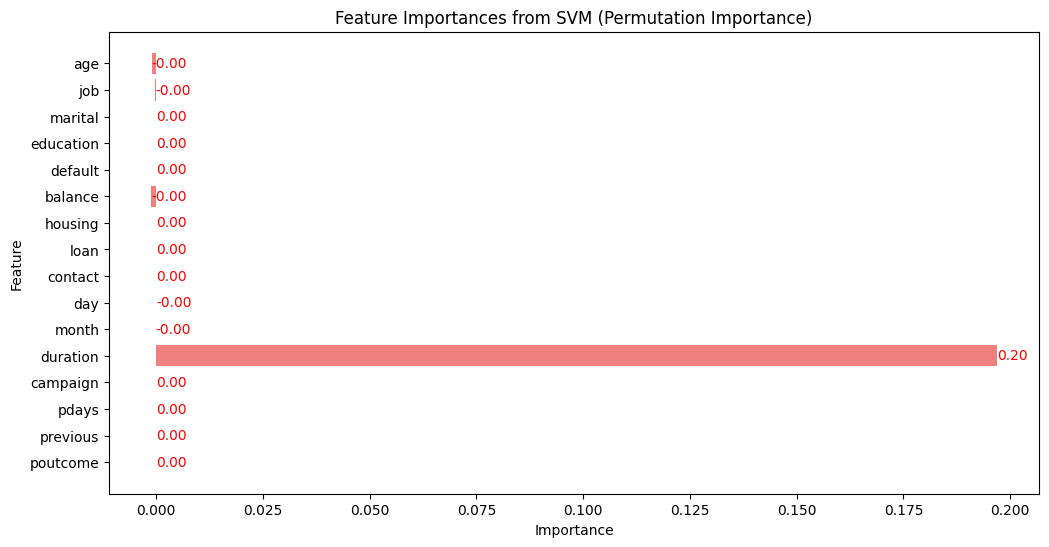

In [ ]:
# Calculate permutation importance for the trained SVM model
perm_importance_svm = permutation_importance(svm, X_test, y_test, n_repeats=10, random_state=42)
svm_importances = perm_importance_svm.importances_mean  # Extract the mean importances

# Set up the figure for the horizontal bar plot
plt.figure(figsize=(12, 6))

# Create a horizontal bar plot for permutation importances of the SVM
plt.barh(feature_names, svm_importances, color='lightcoral')
plt.xlabel('Importance')  # Label for the x-axis
plt.ylabel('Feature')     # Label for the y-axis
plt.title('Feature Importances from SVM (Permutation Importance)')  # Title of the plot
plt.gca().invert_yaxis()  # Invert y-axis for better readability

# Annotate the bars with their importance values
for i, v in enumerate(svm_importances):
    plt.text(v, i, f'{v:.2f}', color='red', va='center')

# Display the plot
plt.show()


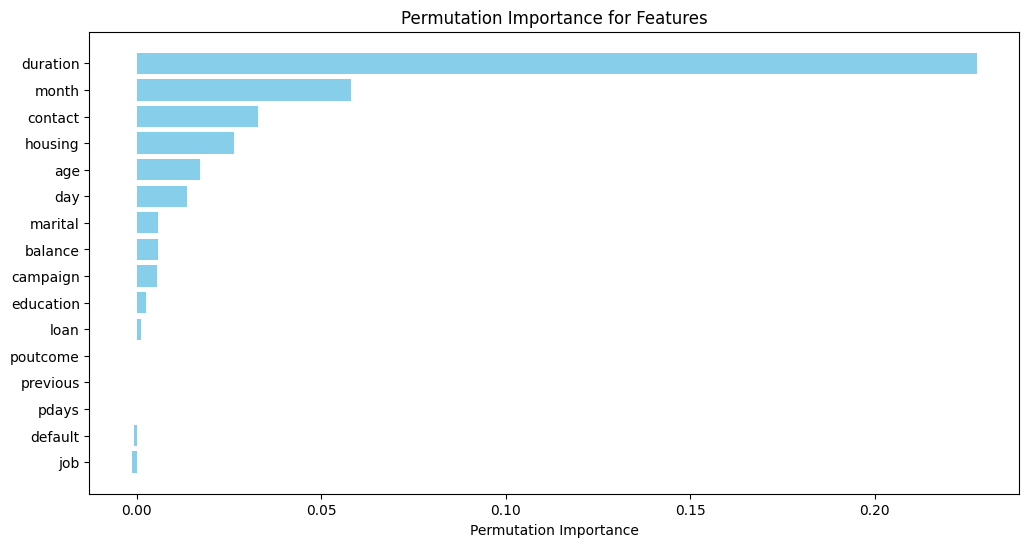

In [ ]:
from sklearn.inspection import permutation_importance  # Import permutation importance function

# Compute permutation importance for the trained Random Forest model
perm_importance = permutation_importance(best_rf, X_test, y_test, n_repeats=10, random_state=42)

# Set up the plot for permutation importance
import matplotlib.pyplot as plt
import numpy as np

plt.figure(figsize=(12, 6))  # Define figure size
sorted_idx = perm_importance.importances_mean.argsort()  # Sort indices of features based on importance

# Create a horizontal bar plot for permutation importances
plt.barh(np.array(X_test.columns)[sorted_idx], perm_importance.importances_mean[sorted_idx], color='skyblue')
plt.xlabel("Permutation Importance")  # Label for the x-axis
plt.title("Permutation Importance for Features")  # Title of the plot
plt.show()  # Display the plot


### Q(7) Recursive Feature Elimination

In [ ]:
from sklearn.feature_selection import RFE  # Import Recursive Feature Elimination
from sklearn.ensemble import RandomForestClassifier  # Import Random Forest classifier
from sklearn.svm import SVC  # Import Support Vector Classifier
from sklearn.neural_network import MLPClassifier  # Import Multi-layer Perceptron Classifier
from sklearn.metrics import accuracy_score  # Import accuracy score metric

# Define optimal parameters for each model
model_rf = RandomForestClassifier(**best_params, random_state=42)  # Initialize Random Forest with best parameters
model_svm = SVC(kernel="linear", random_state=42)  # Initialize SVM with a linear kernel for interpretability
model_nn = MLPClassifier(hidden_layer_sizes=(100, 50), alpha=0.01, learning_rate_init=0.1, max_iter=500, random_state=42)  # Initialize Neural Network

# Define the number of features to select using RFE
n_features_to_select = 5  # Adjust based on the desired number of selected features

# RFE for Random Forest
rfe_rf = RFE(estimator=model_rf, n_features_to_select=n_features_to_select)  # Create RFE object with Random Forest
rfe_rf.fit(X_train, y_train)  # Fit RFE on the training data
y_pred_rfe_rf = rfe_rf.predict(X_test)  # Make predictions on the test set
accuracy_rfe_rf = accuracy_score(y_test, y_pred_rfe_rf)  # Calculate accuracy on the test set

# Print selected features and test accuracy
print("Random Forest - Selected Features:", X_train.columns[rfe_rf.support_])  # Display selected features
print("Random Forest - Test Accuracy after RFE:", round(accuracy_rfe_rf, 2))  # Display test accuracy


Random Forest - Selected Features: Index(['age', 'balance', 'day', 'month', 'duration'], dtype='object')
Random Forest - Test Accuracy after RFE: 0.84


To use RFE with a neural network, you can switch to a different feature selection technique, such as using a wrapper method with a custom implementation or using permutation importance. However, RFE with the neural network model directly is not feasible due to the lack of a feature importance attribute.

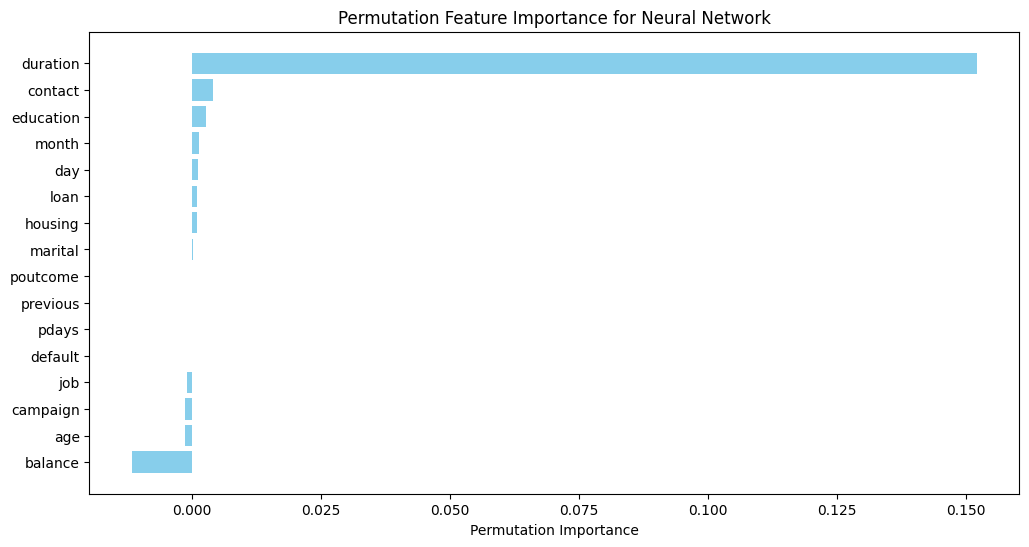

In [ ]:
from sklearn.inspection import permutation_importance  # Import permutation importance
import numpy as np  # Import NumPy for numerical operations

# Train the neural network model
model_nn.fit(X_train, y_train)  # Fit the model on the training data

# Evaluate permutation importance
perm_importance = permutation_importance(model_nn, X_test, y_test, n_repeats=30, random_state=42)  # Compute permutation importance with 30 repeats

# Get sorted feature importance
sorted_idx = perm_importance.importances_mean.argsort()  # Sort feature importances in ascending order

# Plot permutation feature importance
plt.figure(figsize=(12, 6))  # Set figure size
plt.barh(X_train.columns[sorted_idx], perm_importance.importances_mean[sorted_idx], color='skyblue')  # Create horizontal bar plot
plt.xlabel('Permutation Importance')  # Label for x-axis
plt.title('Permutation Feature Importance for Neural Network')  # Title for the plot
plt.show()  # Display the plot


In [ ]:
# RFE for SVM
rfe_svm = RFE(estimator=model_svm, n_features_to_select=n_features_to_select)  # Initialize RFE with SVM model
rfe_svm.fit(X_train, y_train)  # Fit RFE on the training data
y_pred_rfe_svm = rfe_svm.predict(X_test)  # Predict on the test set using selected features
accuracy_rfe_svm = accuracy_score(y_test, y_pred_rfe_svm)  # Calculate accuracy of the predictions

# Print selected features and test accuracy
print("SVM - Selected Features:", X_train.columns[rfe_svm.support_])  # Output the features selected by RFE
print("SVM - Test Accuracy after RFE:", round(accuracy_rfe_svm, 2))  # Output the accuracy rounded to 2 decimal places


**Select Models: Model Comparision**

## Q(8)Model Evaluation Metrics

After running the classification models, you will receive detailed reports that include the following metrics for each model:

### Precision
- **Definition**: Precision measures the proportion of positive identifications that were actually correct.
- **Importance**: High precision is essential when the cost of false positives is high, as it indicates the reliability of the positive predictions.

### Recall
- **Definition**: Recall, also known as sensitivity, reflects the proportion of actual positives that were captured by the model.
- **Importance**: High recall is crucial in situations where false negatives are costly, as it ensures that most positive cases are identified.

### F1 Score
- **Definition**: The F1 score is the harmonic mean of precision and recall, providing a single metric that balances both concerns.
- **Importance**: A higher F1 score indicates better overall model performance, particularly in imbalanced datasets.

### ROC AUC
- **Definition**: The Area Under the Receiver Operating Characteristic (ROC AUC) curve quantifies the model's ability to distinguish between classes.
- **Importance**: A higher AUC score indicates better model performance, as it suggests the model is effective at identifying true positives while minimizing false positives.


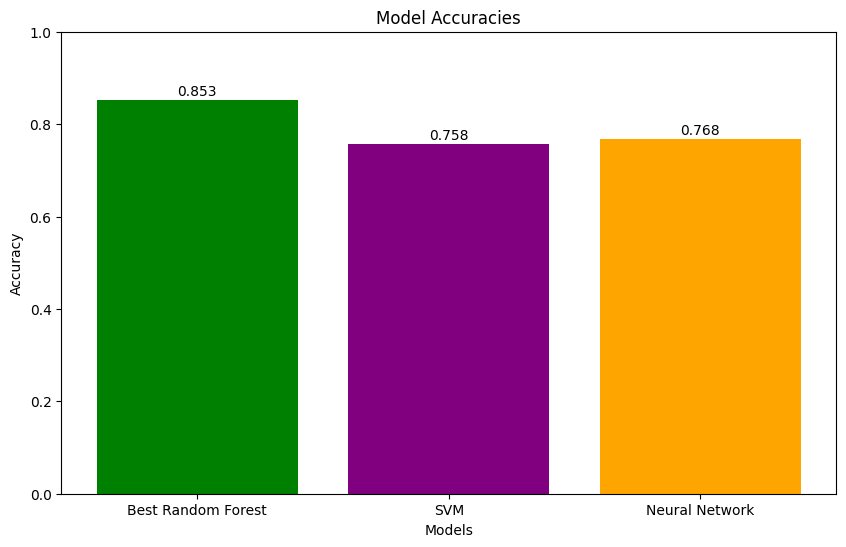

In [ ]:
# Models and their accuracies
models = ['Best Random Forest', 'SVM', 'Neural Network']  # Define the model names
accuracies = [accuracy_best_rf, accuracy_svm_test, accuracy_best_nn_test]  # Collect the corresponding accuracies

# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size for the plot
plt.bar(models, accuracies, color=['green', 'purple', 'orange'])  # Create a bar chart with specified colors

# Annotate each bar with its accuracy value
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.01, f"{v:.3f}", ha='center')  # Add text above each bar with formatted accuracy

plt.xlabel('Models')  # Label for the x-axis
plt.ylabel('Accuracy')  # Label for the y-axis
plt.title('Model Accuracies')  # Title for the plot
plt.ylim(0, 1)  # Set the y-axis limit from 0 to 1
plt.show()  # Display the plot


## ROC Curve

An ROC curve shows a model’s ability to distinguish between classes by plotting the trade-off between True Positive Rate (sensitivity) and False Positive Rate at various thresholds.

- **True Positive Rate (TPR)**: Also known as sensitivity, it represents the proportion of actual positives that are correctly identified by the model.
- **False Positive Rate (FPR)**: This represents the proportion of actual negatives that are incorrectly identified as positives.

### Interpretation
- Points closer to the top-left corner of the ROC curve indicate better model performance, as they reflect high sensitivity with low false positives.
- The Area Under the ROC Curve (AU-ROC) is a single metric that summarizes the curve, with values closer to 1 indicating strong class separation and values near 0.5 suggesting the model performs no better than random guessing.


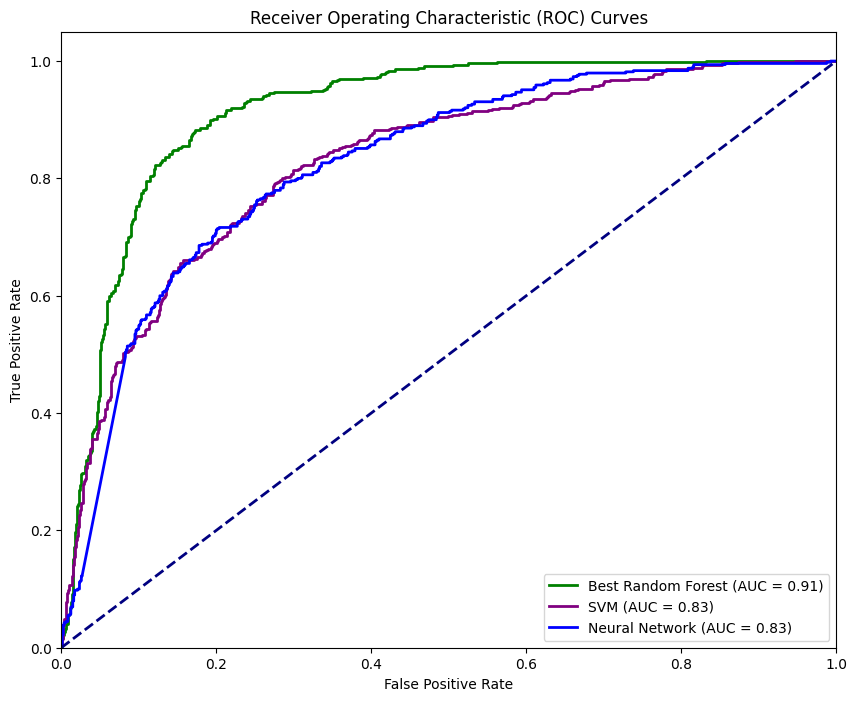

In [ ]:
from sklearn.metrics import roc_curve, auc  # Import necessary functions for ROC analysis
import matplotlib.pyplot as plt  # Import matplotlib for plotting

# Calculate ROC curves and AUC for each model
fpr_best_rf, tpr_best_rf, _ = roc_curve(y_test, best_rf.predict_proba(X_test)[:, 1])  # Random Forest
roc_auc_best_rf = auc(fpr_best_rf, tpr_best_rf)  # Area Under the Curve for Random Forest

fpr_svm, tpr_svm, _ = roc_curve(y_test, svm.decision_function(X_test))  # SVM
roc_auc_svm = auc(fpr_svm, tpr_svm)  # Area Under the Curve for SVM

fpr_nn, tpr_nn, _ = roc_curve(y_test, best_nn.predict_proba(X_test)[:, 1])  # Neural Network
roc_auc_nn = auc(fpr_nn, tpr_nn)  # Area Under the Curve for Neural Network

# Plotting ROC curves
plt.figure(figsize=(10, 8))  # Set the figure size
plt.plot(fpr_best_rf, tpr_best_rf, color='green', lw=2, label=f'Best Random Forest (AUC = {roc_auc_best_rf:.2f})')  # Plot RF ROC curve
plt.plot(fpr_svm, tpr_svm, color='purple', lw=2, label=f'SVM (AUC = {roc_auc_svm:.2f})')  # Plot SVM ROC curve
plt.plot(fpr_nn, tpr_nn, color='blue', lw=2, label=f'Neural Network (AUC = {roc_auc_nn:.2f})')  # Plot NN ROC curve

plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line representing random chance
plt.xlim([0.0, 1.0])  # Set x-axis limits
plt.ylim([0.0, 1.05])  # Set y-axis limits
plt.xlabel('False Positive Rate')  # Label for the x-axis
plt.ylabel('True Positive Rate')  # Label for the y-axis
plt.title('Receiver Operating Characteristic (ROC) Curves')  # Title for the plot
plt.legend(loc="lower right")  # Position of the legend
plt.show()  # Display the plot


In [46]:
df2.describe

<bound method NDFrame.describe of        age  job  marital  education  default  balance  housing  loan  contact  \
3       55    7        1          1        0     2476        1     0        2   
4       54    0        1          2        0      184        0     0        2   
5       42    4        2          2        0        0        1     1        2   
8       37    9        1          1        0        1        1     0        2   
10      38    0        2          1        0      100        1     0        2   
...    ...  ...      ...        ...      ...      ...      ...   ...      ...   
11156   34    1        2          1        0      -72        1     0        0   
11157   33    1        2          0        0        1        1     0        0   
11158   39    7        1          1        0      733        0     0        2   
11159   32    9        2          1        0       29        0     0        0   
11161   34    9        1          1        0        0        0     0       

In [47]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,0,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,0,1
5,42,4,2,2,0,0,1,1,2,5,8,562,2,-1,0,0,1
8,37,9,1,1,0,1,1,0,2,6,8,608,1,-1,0,0,1
10,38,0,2,1,0,100,1,0,2,7,8,786,1,-1,0,0,1


In [ ]:
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Separate data for months June and July for testing and the rest for training
train_data = df2[~df2['month'].isin([6, 7])]  # Training data: exclude June (6) and July (7)
test_data = df2[df2['month'].isin([6, 7])]    # Testing data: include only June (6) and July (7)

# Separate features and labels
X_train = train_data.drop(columns='deposit')  # Features for training
y_train = train_data['deposit']                # Labels for training
X_test = test_data.drop(columns='deposit')    # Features for testing
y_test = test_data['deposit']                  # Labels for testing

# Define models with previously optimized parameters
model_rf = RandomForestClassifier(**best_params, random_state=42)  # Random Forest model
model_svm = SVC(kernel='linear', probability=True, random_state=42)  # SVM model with probability estimates
model_nn = MLPClassifier(hidden_layer_sizes=(100, 50), alpha=0.01, learning_rate_init=0.1, max_iter=500, random_state=42)  # Neural Network model

# Train and evaluate each model
models = {'Random Forest': model_rf, 'SVM': model_svm, 'Neural Network': model_nn}  # Dictionary of models
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    # Calculate AUC based on the model type
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if name != 'SVM' else roc_auc_score(y_test, model.decision_function(X_test))

    # Print results
    print(f"Model: {name}")
    print(f"Accuracy on June/July test data: {accuracy:.2f}")
    print(f"AUC on June/July test data: {auc_score:.2f}")
    print(classification_report(y_test, y_pred))  # Detailed classification report
    print("\n")



Model: Random Forest
Accuracy on June/July test data: 0.78
AUC on June/July test data: 0.87
              precision    recall  f1-score   support

           0       0.73      0.95      0.83       522
           1       0.89      0.56      0.68       403

    accuracy                           0.78       925
   macro avg       0.81      0.75      0.76       925
weighted avg       0.80      0.78      0.76       925





### Q9(a)

In [ ]:
# Define the models with the specified parameters
model_rf = RandomForestClassifier(**best_params_rf, random_state=42)
model_svm = SVC(kernel='linear', probability=True, random_state=42)  # Ensure probability=True for ROC AUC
model_nn = MLPClassifier(hidden_layer_sizes=(100, 50), alpha=0.01, learning_rate_init=0.1, max_iter=500, random_state=42)

# Train and evaluate each model
models = {'Random Forest': model_rf, 'SVM': model_svm, 'Neural Network': model_nn}
for name, model in models.items():
    model.fit(X_train, y_train)  # Train the model
    y_pred = model.predict(X_test)  # Predict on test set
    accuracy = accuracy_score(y_test, y_pred)
    auc_score = roc_auc_score(y_test, model.predict_proba(X_test)[:, 1]) if name != 'SVM' else roc_auc_score(y_test, model.decision_function(X_test))
    
    print(f"Model: {name}")
    print(f"Accuracy on June/July test data: {accuracy:.2f}")
    print(f"AUC on June/July test data: {auc_score:.2f}")
    print(classification_report(y_test, y_pred))
    print("\n")


In [ ]:
# Train and evaluate Random Forest
model_rf = RandomForestClassifier(**best_params_rf, random_state=42)

# Fit the model
model_rf.fit(X_train, y_train)

# Make predictions
y_pred_rf = model_rf.predict(X_test)
y_proba_rf = model_rf.predict_proba(X_test)[:, 1]  # Probabilities for the positive class

# Calculate accuracy and AUC
accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)


In [ ]:
# Train and evaluate SVM
model_svm = SVC(random_state=42, probability=True)

# Fit the model
model_svm.fit(X_train, y_train)

# Make predictions
y_pred_svm = model_svm.predict(X_test)
y_proba_svm = model_svm.decision_function(X_test)  # Decision function scores

# Calculate accuracy and AUC
accuracy_svm = accuracy_score(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_proba_svm)


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score

# Train and evaluate Neural Network
model_nn = MLPClassifier(hidden_layer_sizes=(100, 50), alpha=0.01, learning_rate_init=0.1, max_iter=500, random_state=42)

# Fit the model
model_nn.fit(X_train, y_train)

# Make predictions
y_pred_nn = model_nn.predict(X_test)
y_proba_nn = model_nn.predict_proba(X_test)[:, 1]  # Get predicted probabilities for the positive class

# Calculate accuracy and AUC
accuracy_nn = accuracy_score(y_test, y_pred_nn)
auc_nn = roc_auc_score(y_test, y_proba_nn)

In [36]:
# Print results
print("Random Forest - Accuracy:", round(accuracy_rf, 2), "AUC:", round(auc_rf, 2))
print("SVM - Accuracy:", round(accuracy_svm, 2), "AUC:", round(auc_svm, 2))
print("Neural Network - Accuracy:", round(accuracy_nn, 2), "AUC:", round(auc_nn, 2))

print("\nClassification Report - Random Forest:\n", classification_report(y_test, y_pred_rf))
print("\nClassification Report - SVM:\n", classification_report(y_test, y_pred_svm))
print("\nClassification Report - Neural Network:\n", classification_report(y_test, y_pred_nn))

Random Forest - Accuracy: 0.85 AUC: 0.91
SVM - Accuracy: 0.76 AUC: 0.83
Neural Network - Accuracy: 0.77 AUC: 0.83

Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.90      0.86      0.88       810
           1       0.79      0.84      0.81       490

    accuracy                           0.85      1300
   macro avg       0.84      0.85      0.85      1300
weighted avg       0.86      0.85      0.85      1300


Classification Report - SVM:
               precision    recall  f1-score   support

           0       0.76      0.89      0.82       810
           1       0.75      0.53      0.62       490

    accuracy                           0.76      1300
   macro avg       0.76      0.71      0.72      1300
weighted avg       0.76      0.76      0.75      1300


Classification Report - Neural Network:
               precision    recall  f1-score   support

           0       0.79      0.86      0.82       810
         

In [37]:
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
3,55,7,1,1,0,2476,1,0,2,5,8,579,1,-1,0,0,1
4,54,0,1,2,0,184,0,0,2,5,8,673,2,-1,0,0,1
5,42,4,2,2,0,0,1,1,2,5,8,562,2,-1,0,0,1
8,37,9,1,1,0,1,1,0,2,6,8,608,1,-1,0,0,1
10,38,0,2,1,0,100,1,0,2,7,8,786,1,-1,0,0,1


### Q9(b)

In [38]:
# Step 1: Split data - all professions except 'technician' (assuming 'technician' is encoded as 9 in job column)
# Adjust the code if the 'technician' profession is represented by a different code in your data.
train_data = df2[df2['job'] != 4]
test_data = df2[df2['job'] == 4]

# Verify the sizes of the training and test sets
print("Training Data Shape:", train_data.shape)
print("Test Data Shape (Technicians only):", test_data.shape)

# Step 2: Identify a close substitute for 'technician' based on job frequencies or similarity of feature distributions
job_counts = train_data['job'].value_counts()
print("Job counts in training data (non-technicians):")
print(job_counts)

# Optionally, examine feature distributions to determine the closest job
# Calculate average balance or age, for instance, grouped by job type
avg_balance_by_job = train_data.groupby('job')['balance'].mean()
print("Average Balance by Job Type (non-technicians):")
print(avg_balance_by_job)

# Based on output, identify the closest profession to 'technician'
# (Suppose 'job' 3 or 5 has a similar balance, we could use this as a closest substitute)

# Step 3: Define features and labels for training and testing
X_train = train_data.drop(columns=['deposit'])
y_train = train_data['deposit']
X_test = test_data.drop(columns=['deposit'])
y_test = test_data['deposit']

model_rf.fit(X_train, y_train)
y_pred_rf = model_rf.predict(X_test)
y_proba_rf = model_rf.predict_proba(X_test)[:, 1]
accuracy_rf = accuracy_score(y_test, y_pred_rf)
auc_rf = roc_auc_score(y_test, y_proba_rf)

model_svm.fit(X_train, y_train)
y_pred_svm = model_svm.predict(X_test)
y_proba_svm = model_svm.decision_function(X_test)
accuracy_svm = accuracy_score(y_test, y_pred_svm)
auc_svm = roc_auc_score(y_test, y_proba_svm)

model_nn.fit(X_train, y_train)
y_pred_nn = model_nn.predict(X_test)
y_proba_nn = model_nn.predict_proba(X_test)[:, 1]
accuracy_nn = accuracy_score(y_test, y_pred_nn)
auc_nn = roc_auc_score(y_test, y_proba_nn)

# Print results
print("Random Forest - Accuracy:", round(accuracy_rf, 2), "AUC:", round(auc_rf, 2))
print("SVM - Accuracy:", round(accuracy_svm, 2), "AUC:", round(auc_svm, 2))
print("Neural Network - Accuracy:", round(accuracy_nn, 2), "AUC:", round(auc_nn, 2))

print("\nClassification Report - Random Forest:\n", classification_report(y_test, y_pred_rf))
print("\nClassification Report - SVM:\n", classification_report(y_test, y_pred_svm))
print("\nClassification Report - Neural Network:\n", classification_report(y_test, y_pred_nn))


Training Data Shape: (5079, 17)
Test Data Shape (Technicians only): (1419, 17)
Job counts in training data (non-technicians):
job
1     1262
9     1074
0      764
7      587
5      341
6      229
10     217
2      215
8      185
3      171
11      34
Name: count, dtype: int64
Average Balance by Job Type (non-technicians):
job
0     657.409686
1     648.643423
2     687.600000
3     821.128655
5     986.413490
6     754.703057
7     655.245315
8     791.140541
9     749.869646
10    838.760369
11    849.676471
Name: balance, dtype: float64
Random Forest - Accuracy: 0.81 AUC: 0.9
SVM - Accuracy: 0.74 AUC: 0.81
Neural Network - Accuracy: 0.69 AUC: 0.84

Classification Report - Random Forest:
               precision    recall  f1-score   support

           0       0.84      0.86      0.85       870
           1       0.77      0.75      0.76       549

    accuracy                           0.81      1419
   macro avg       0.81      0.80      0.80      1419
weighted avg       0.81      

### Objective 2 (Transfer Learning)

In [41]:
import torch
import torch.nn as nn
import torch.optim as optim
from torch.optim import lr_scheduler
import torch.backends.cudnn as cudnn
import numpy as np
import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt
import time
import os
from PIL import Image
from tempfile import TemporaryDirectory

cudnn.benchmark = True
plt.ion()

In [ ]:
# Data augmentation and normalization for training
# Normalization for validation dataset only
data_transforms = {
    'train': transforms.Compose([
        transforms.RandomResizedCrop(224),  # Randomly crop and resize images to 224x224
        transforms.RandomHorizontalFlip(),    # Randomly flip images horizontally
        transforms.ToTensor(),                # Convert images to PyTorch tensors
        transforms.Normalize([0.485, 0.456, 0.406],  # Normalize with ImageNet statistics
                             [0.229, 0.224, 0.225])
    ]),
    'val': transforms.Compose([
        transforms.Resize(256),              # Resize images to 256 pixels
        transforms.CenterCrop(224),          # Center crop images to 224x224
        transforms.ToTensor(),                # Convert images to PyTorch tensors
        transforms.Normalize([0.485, 0.456, 0.406],  # Normalize with ImageNet statistics
                             [0.229, 0.224, 0.225])
    ]),
}

# Specify the directory containing the dataset
data_dir = 'hymenoptera_data'

# Load datasets with specified transformations
image_datasets = {x: datasets.ImageFolder(os.path.join(data_dir, x),
                                          data_transforms[x])
                  for x in ['train', 'val']}

# Create data loaders for the training and validation datasets
dataloaders = {x: torch.utils.data.DataLoader(image_datasets[x], batch_size=4,
                                             shuffle=True, num_workers=4)
              for x in ['train', 'val']}

# Get the sizes of the datasets
dataset_sizes = {x: len(image_datasets[x]) for x in ['train', 'val']}

# Get class names from the training dataset
class_names = image_datasets['train'].classes

# Set the device to GPU if available, otherwise use CPU
device = torch.device("cuda:0" if torch.cuda.is_available() else "CPU")


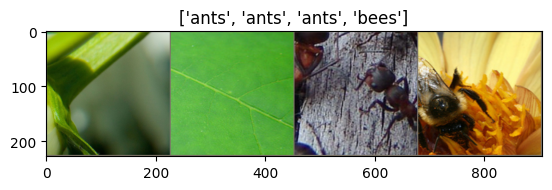

In [ ]:
def imshow(inp, title=None):
    """Display image for Tensor."""
    # Convert the tensor to a numpy array and transpose dimensions for display
    inp = inp.numpy().transpose((1, 2, 0))
    
    # Define the mean and standard deviation for normalization
    mean = np.array([0.485, 0.456, 0.406])  # Mean used for normalization
    std = np.array([0.229, 0.224, 0.225])   # Standard deviation used for normalization
    
    # Denormalize the image by reversing the normalization process
    inp = std * inp + mean
    
    # Clip the values to be in the range [0, 1] for proper display
    inp = np.clip(inp, 0, 1)
    
    # Display the image
    plt.imshow(inp)
    
    # Set the title if provided
    if title is not None:
        plt.title(title)
    
    # Pause briefly to allow the plot to update
    plt.pause(0.001)

# Get a batch of training data from the DataLoader
inputs, classes = next(iter(dataloaders['train']))

# Create a grid of images from the batch
out = torchvision.utils.make_grid(inputs)

# Display the images with their corresponding class names as the title
imshow(out, title=[class_names[x] for x in classes])


In [ ]:
def train_model(model, criterion, optimizer, scheduler, num_epochs=25):
    """Train the model and evaluate it on the validation set.

    Args:
        model: The neural network model to be trained.
        criterion: The loss function.
        optimizer: The optimizer for model parameter updates.
        scheduler: Learning rate scheduler.
        num_epochs: Number of epochs to train the model.

    Returns:
        model: The trained model with the best validation accuracy.
    """
    since = time.time()  # Record the start time of training

    # Create a temporary directory to save training checkpoints
    with TemporaryDirectory() as tempdir:
        best_model_params_path = os.path.join(tempdir, 'best_model_params.pt')  # Path to save the best model

        # Save the initial state of the model (not necessary but can be useful)
        torch.save(model.state_dict(), best_model_params_path)
        best_acc = 0.0  # Initialize the best accuracy

        for epoch in range(num_epochs):  # Loop over each epoch
            print(f'Epoch {epoch}/{num_epochs - 1}')
            print('-' * 10)

            # Each epoch has a training and validation phase
            for phase in ['train', 'val']:
                if phase == 'train':
                    model.train()  # Set model to training mode
                else:
                    model.eval()   # Set model to evaluation mode

                running_loss = 0.0  # Initialize loss for the epoch
                running_corrects = 0  # Initialize correct predictions for the epoch

                # Iterate over data in the DataLoader for the current phase
                for inputs, labels in dataloaders[phase]:
                    inputs = inputs.to(device)  # Move inputs to the configured device (CPU or GPU)
                    labels = labels.to(device)  # Move labels to the configured device

                    # Zero the parameter gradients
                    optimizer.zero_grad()

                    # Forward pass
                    # Track history if only in training phase
                    with torch.set_grad_enabled(phase == 'train'):
                        outputs = model(inputs)  # Get model outputs
                        _, preds = torch.max(outputs, 1)  # Get predictions
                        loss = criterion(outputs, labels)  # Compute the loss

                        # Backward pass and optimization only if in training phase
                        if phase == 'train':
                            loss.backward()  # Compute gradients
                            optimizer.step()  # Update model parameters

                    # Update statistics
                    running_loss += loss.item() * inputs.size(0)  # Accumulate loss
                    running_corrects += torch.sum(preds == labels.data)  # Count correct predictions

                if phase == 'train':
                    scheduler.step()  # Update the learning rate based on the scheduler

                # Calculate and print the loss and accuracy for the epoch
                epoch_loss = running_loss / dataset_sizes[phase]
                epoch_acc = running_corrects.double() / dataset_sizes[phase]

                print(f'{phase} Loss: {epoch_loss:.4f} Acc: {epoch_acc:.4f}')

                # Deep copy the model if the current validation accuracy is better
                if phase == 'val' and epoch_acc > best_acc:
                    best_acc = epoch_acc
                    torch.save(model.state_dict(), best_model_params_path)  # Save the best model weights

            print()  # Print a newline for better readability

        # Calculate and print the total training time
        time_elapsed = time.time() - since
        print(f'Training complete in {time_elapsed // 60:.0f}m {time_elapsed % 60:.0f}s')
        print(f'Best val Acc: {best_acc:4f}')

        # Load the best model weights
        model.load_state_dict(torch.load(best_model_params_path, weights_only=True))

    return model  # Return the trained model


In [ ]:
def visualize_model(model, num_images=6):
    """Visualize predictions made by the model on a sample of validation images.

    Args:
        model: The trained neural network model to visualize.
        num_images: The number of images to display predictions for.
    """
    was_training = model.training  # Save the current training state of the model
    model.eval()  # Set the model to evaluation mode
    images_so_far = 0  # Initialize a counter for displayed images
    fig = plt.figure()  # Create a new figure for displaying images

    with torch.no_grad():  # Disable gradient calculation for inference
        # Iterate over batches of validation data
        for i, (inputs, labels) in enumerate(dataloaders['val']):
            inputs = inputs.to(device)  # Move inputs to the configured device (CPU or GPU)
            labels = labels.to(device)  # Move labels to the configured device

            outputs = model(inputs)  # Get model outputs
            _, preds = torch.max(outputs, 1)  # Get predicted class indices

            # Loop over the batch of images
            for j in range(inputs.size()[0]):
                images_so_far += 1  # Increment the image counter
                ax = plt.subplot(num_images // 2, 2, images_so_far)  # Create a subplot for the current image
                ax.axis('off')  # Hide axis ticks and labels
                ax.set_title(f'predicted: {class_names[preds[j]]}')  # Set title to show the predicted class
                imshow(inputs.cpu().data[j])  # Display the image

                # Stop after displaying the specified number of images
                if images_so_far == num_images:
                    model.train(mode=was_training)  # Restore the model's training state
                    return  # Exit the function

    # Restore the model's training state if we exit the loop without reaching num_images
    model.train(mode=was_training)


In [ ]:
# Load the pre-trained ResNet-18 model
model_ft = models.resnet18(weights='IMAGENET1K_V1')

# Get the number of input features for the fully connected layer
num_ftrs = model_ft.fc.in_features

# Modify the final fully connected layer to output 2 classes (for binary classification)
# Alternatively, for multi-class classification, use: nn.Linear(num_ftrs, len(class_names))
model_ft.fc = nn.Linear(num_ftrs, 2)

# Move the model to the appropriate device (GPU if available, otherwise CPU)
model_ft = model_ft.to(device)

# Define the loss function: CrossEntropyLoss is commonly used for multi-class classification
criterion = nn.CrossEntropyLoss()

# Set up the optimizer: Stochastic Gradient Descent (SGD) with learning rate and momentum
optimizer_ft = optim.SGD(model_ft.parameters(), lr=0.001, momentum=0.9)

# Create a learning rate scheduler: Decays the learning rate by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_ft, step_size=7, gamma=0.1)


Downloading: "https://download.pytorch.org/models/resnet18-f37072fd.pth" to C:\Users\HP5CD/.cache\torch\hub\checkpoints\resnet18-f37072fd.pth
100%|██████████| 44.7M/44.7M [00:07<00:00, 5.99MB/s]


In [47]:
model_ft = train_model(model_ft, criterion, optimizer_ft, exp_lr_scheduler,
                       num_epochs=25)

Epoch 0/24
----------
train Loss: 0.6465 Acc: 0.6680
val Loss: 0.1582 Acc: 0.9346

Epoch 1/24
----------
train Loss: 0.5282 Acc: 0.7992
val Loss: 0.1864 Acc: 0.9150

Epoch 2/24
----------
train Loss: 0.5225 Acc: 0.8156
val Loss: 0.4393 Acc: 0.8039

Epoch 3/24
----------
train Loss: 0.4339 Acc: 0.8074
val Loss: 0.3582 Acc: 0.8954

Epoch 4/24
----------
train Loss: 0.4966 Acc: 0.8197
val Loss: 0.2811 Acc: 0.9216

Epoch 5/24
----------
train Loss: 0.4862 Acc: 0.8074
val Loss: 0.5216 Acc: 0.8366

Epoch 6/24
----------
train Loss: 0.5485 Acc: 0.8156
val Loss: 0.7745 Acc: 0.7974

Epoch 7/24
----------
train Loss: 0.4685 Acc: 0.7869
val Loss: 0.2414 Acc: 0.9150

Epoch 8/24
----------
train Loss: 0.3995 Acc: 0.8484
val Loss: 0.2001 Acc: 0.9346

Epoch 9/24
----------
train Loss: 0.3781 Acc: 0.8320
val Loss: 0.1878 Acc: 0.9412

Epoch 10/24
----------
train Loss: 0.2810 Acc: 0.8811
val Loss: 0.1804 Acc: 0.9412

Epoch 11/24
----------
train Loss: 0.3126 Acc: 0.8730
val Loss: 0.1834 Acc: 0.9412

Ep

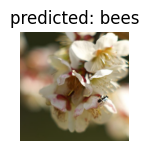

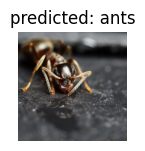

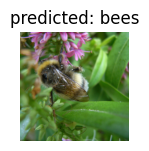

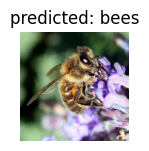

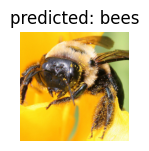

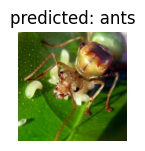

In [48]:
visualize_model(model_ft)

In [ ]:
# Load the pre-trained ResNet-18 model
model_conv = torchvision.models.resnet18(weights='IMAGENET1K_V1')

# Freeze all parameters in the model to prevent them from being updated during training
for param in model_conv.parameters():
    param.requires_grad = False

# Get the number of input features for the fully connected layer
num_ftrs = model_conv.fc.in_features

# Modify the final fully connected layer to output 2 classes (for binary classification)
model_conv.fc = nn.Linear(num_ftrs, 2)

# Move the model to the appropriate device (GPU if available, otherwise CPU)
model_conv = model_conv.to(device)

# Define the loss function: CrossEntropyLoss is commonly used for multi-class classification
criterion = nn.CrossEntropyLoss()

# Set up the optimizer: Only the parameters of the final layer are being optimized
optimizer_conv = optim.SGD(model_conv.fc.parameters(), lr=0.001, momentum=0.9)

# Create a learning rate scheduler: Decays the learning rate by a factor of 0.1 every 7 epochs
exp_lr_scheduler = lr_scheduler.StepLR(optimizer_conv, step_size=7, gamma=0.1)


In [50]:
model_conv = train_model(model_conv, criterion, optimizer_conv,
                         exp_lr_scheduler, num_epochs=25)

Epoch 0/24
----------
train Loss: 0.8035 Acc: 0.5943
val Loss: 0.2346 Acc: 0.9281

Epoch 1/24
----------
train Loss: 0.5500 Acc: 0.7787
val Loss: 0.2363 Acc: 0.9150

Epoch 2/24
----------
train Loss: 0.5345 Acc: 0.7705
val Loss: 0.2906 Acc: 0.8889

Epoch 3/24
----------
train Loss: 0.5069 Acc: 0.7623
val Loss: 0.2256 Acc: 0.9085

Epoch 4/24
----------
train Loss: 0.4085 Acc: 0.8279
val Loss: 0.1641 Acc: 0.9542

Epoch 5/24
----------
train Loss: 0.4217 Acc: 0.8197
val Loss: 0.1958 Acc: 0.9412

Epoch 6/24
----------
train Loss: 0.4501 Acc: 0.8115
val Loss: 0.2571 Acc: 0.9085

Epoch 7/24
----------
train Loss: 0.3367 Acc: 0.8361
val Loss: 0.1707 Acc: 0.9477

Epoch 8/24
----------
train Loss: 0.2825 Acc: 0.8811
val Loss: 0.1623 Acc: 0.9608

Epoch 9/24
----------
train Loss: 0.3809 Acc: 0.8689
val Loss: 0.1700 Acc: 0.9346

Epoch 10/24
----------
train Loss: 0.3656 Acc: 0.8361
val Loss: 0.1884 Acc: 0.9412

Epoch 11/24
----------
train Loss: 0.3349 Acc: 0.8402
val Loss: 0.1658 Acc: 0.9542

Ep

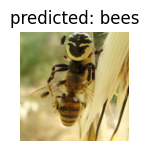

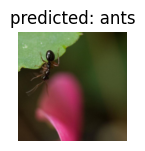

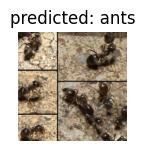

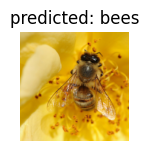

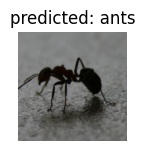

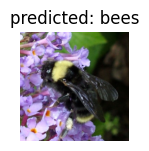

In [51]:
visualize_model(model_conv)

plt.ioff()
plt.show()

In [ ]:
def visualize_model_predictions(model, img_path):
    """Visualize model predictions for a single image.

    Args:
        model: The trained model used for predictions.
        img_path (str): The path to the image to be predicted.
    """
    was_training = model.training  # Store the current training mode of the model
    model.eval()  # Set the model to evaluation mode

    # Load the image from the specified path
    img = Image.open(img_path)
    
    # Apply the necessary transformations (like resizing, normalization) to the image
    img = data_transforms['val'](img)
    
    # Add a batch dimension to the image tensor
    img = img.unsqueeze(0)
    
    # Move the image tensor to the appropriate device (GPU or CPU)
    img = img.to(device)

    with torch.no_grad():  # Disable gradient computation for efficiency
        # Forward pass: Get the model's output for the image
        outputs = model(img)
        
        # Get the predicted class index by finding the maximum output score
        _, preds = torch.max(outputs, 1)

        # Set up the plot for visualization
        ax = plt.subplot(2, 2, 1)  # Create a subplot (2 rows, 2 columns)
        ax.axis('off')  # Turn off axis
        ax.set_title(f'Predicted: {class_names[preds[0]]}')  # Set title with predicted class name

        # Show the image using the custom imshow function
        imshow(img.cpu().data[0])

    # Restore the original training mode of the model
    model.train(mode=was_training)


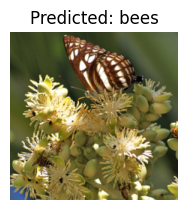

In [ ]:
# Visualize the model's prediction for a specific image
visualize_model_predictions(
    model_conv,  # The trained convolutional model
    img_path='hymenoptera_data/val/bees/72100438_73de9f17af.jpg'  # Path to the image file
)

# Disable interactive mode for matplotlib
plt.ioff()  # Turns off interactive mode

# Display the plot
plt.show()  # Renders the plot on the screen


### Q11
Function that outputs ResNet18 features for a given input image

In [ ]:
import torch
import torchvision.models as models
import torchvision.transforms as transforms
from torch.utils.data import DataLoader
import numpy as np

# Load the pre-trained ResNet18 model
model = models.resnet18(pretrained=True)

# Remove the final fully connected layer to use the output as feature vectors
model = torch.nn.Sequential(*list(model.children())[:-1])

# Set the model to evaluation mode
model.eval()

# Define image transformation (normalization according to ImageNet standards)
transform = transforms.Compose([
    transforms.Resize((224, 224)),  # Resize images to 224x224 pixels
    transforms.ToTensor(),  # Convert images to tensor format
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]),  # Normalize based on ImageNet statistics
])

# Function to extract features for an image dataset
def extract_features(data_loader):
    features_list = []  # Initialize a list to store feature vectors

    with torch.no_grad():  # Disable gradient computation
        for inputs, _ in data_loader:  # Only inputs are needed, labels are ignored
            inputs = inputs.to(torch.device("cpu"))  # Move inputs to CPU
            outputs = model(inputs)  # Forward pass through the model
            features_list.append(outputs.view(outputs.size(0), -1))  # Flatten the output to Nx512

    # Concatenate all features into an Nx512 array
    return torch.cat(features_list).cpu().numpy()

# Assuming you have defined image_datasets['train'] with a dataset (e.g., ImageFolder)
train_loader = DataLoader(image_datasets['train'], batch_size=32, shuffle=False, num_workers=4)

# Extract features for the training images
train_features = extract_features(train_loader)
print("Extracted features shape:", train_features.shape)  # Should be (N, 512)


Extracted features shape: (244, 512)


In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, f1_score

# Assuming X_train, X_test, y_train, y_test are already defined and split

# 1. L2 Regularized Logistic Regression (C is the inverse of regularization strength)
param_grid_lr = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}  # Hyperparameter grid for logistic regression
log_reg = LogisticRegression(penalty='l2', solver='liblinear', random_state=42)  # Initialize the model
grid_search_lr = GridSearchCV(log_reg, param_grid_lr, cv=5, scoring='f1')  # Perform grid search
grid_search_lr.fit(X_train, y_train)  # Fit the model

# Best logistic regression model
best_log_reg = grid_search_lr.best_estimator_  # Get the best model from grid search
y_pred_lr = best_log_reg.predict(X_test)  # Predict on the test set
accuracy_lr = accuracy_score(y_test, y_pred_lr)  # Calculate accuracy
f1_lr = f1_score(y_test, y_pred_lr)  # Calculate F1 score

# 2. Random Forest
param_grid_rf = {
    'n_estimators': [50, 100, 200],  # Number of trees in the forest
    'max_depth': [5, 10, 20, None],   # Maximum depth of the trees
}
rf = RandomForestClassifier(random_state=42)  # Initialize the random forest model
grid_search_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='f1')  # Perform grid search
grid_search_rf.fit(X_train, y_train)  # Fit the model

# Best random forest model
best_rf = grid_search_rf.best_estimator_  # Get the best model from grid search
y_pred_rf = best_rf.predict(X_test)  # Predict on the test set
accuracy_rf = accuracy_score(y_test, y_pred_rf)  # Calculate accuracy
f1_rf = f1_score(y_test, y_pred_rf)  # Calculate F1 score

# Display results
print("L2 Regularized Logistic Regression:")
print(f"Best Parameters: {grid_search_lr.best_params_}")  # Best hyperparameters
print(f"Accuracy: {accuracy_lr:.2f}")  # Accuracy of logistic regression
print(f"F1 Score: {f1_lr:.2f}\n")  # F1 score of logistic regression

print("Random Forest:")
print(f"Best Parameters: {grid_search_rf.best_params_}")  # Best hyperparameters
print(f"Accuracy: {accuracy_rf:.2f}")  # Accuracy of random forest
print(f"F1 Score: {f1_rf:.2f}")  # F1 score of random forest


L2 Regularized Logistic Regression:
Best Parameters: {'C': 10}
Accuracy: 0.77
F1 Score: 0.69

Random Forest:
Best Parameters: {'max_depth': None, 'n_estimators': 200}
Accuracy: 0.82
F1 Score: 0.76


### Inference and Summary

The results obtained from the comparison of L2 regularized logistic regression and random forest classifiers provide valuable insights into their performance and suitability for the given task:

1. **Model Performance**:
   - **Logistic Regression**: 
     - Achieved an accuracy of **77%** and an F1 score of **0.69**. 
     - The model’s performance indicates that it can correctly classify a substantial portion of the data but has limitations, particularly in balancing precision and recall (as suggested by the lower F1 score). This suggests that there may be some misclassifications, particularly in the positive class.
   - **Random Forest**: 
     - Outperformed logistic regression with an accuracy of **82%** and an F1 score of **0.76**. 
     - The higher accuracy and F1 score indicate that the random forest model effectively captures complex patterns and relationships in the data. It demonstrates better handling of feature interactions, which is crucial for improving classification performance.

2. **Parameter Tuning**:
   - The best parameters for logistic regression were found to be **C = 10**, which suggests that a moderate level of regularization is effective for this model. This setting allows for some flexibility while avoiding overfitting.
   - For the random forest, the optimal settings were **max_depth = None** and **n_estimators = 200**. These parameters indicate that the model benefits from a deeper structure and a larger number of trees, enhancing its ability to generalize well to unseen data.

3. **Interpretability vs. Performance**:
   - The logistic regression model is more interpretable, allowing for insights into the influence of individual features on the predictions. However, its linear nature may not adequately capture complex relationships in the data.
   - The random forest, while less interpretable, provides better overall performance, making it a suitable choice for scenarios where predictive accuracy is prioritized over interpretability.

4. **Recommendations**:
   - If the primary goal is to achieve the highest predictive accuracy and handle complex data interactions, the random forest model is the superior choice based on the results.
   - Conversely, if model interpretability is critical (for instance, in domains like healthcare or finance), and the goal is to understand feature contributions, logistic regression may still be a viable option, albeit with a slightly lower performance.

### Conclusion

In summary, the random forest classifier outperformed the L2 regularized logistic regression in both accuracy and F1 score, making it the preferred model for this task. The results highlight the trade-offs between model complexity, performance, and interpretability, guiding the choice of model based on the specific requirements of the application.
